## DECLARATION OF LIBRARY

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import statistics

from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn import * 
import math

## READ FILE GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sod_df = pd.read_excel('/content/drive/Shareddrives/FDA_FinalProject/AdventureWorks Sales.xlsx', sheet_name='Sales Order_data')
st_df = pd.read_excel('/content/drive/Shareddrives/FDA_FinalProject/AdventureWorks Sales.xlsx', sheet_name='Sales Territory_data')
sd_df = pd.read_excel('/content/drive/Shareddrives/FDA_FinalProject/AdventureWorks Sales.xlsx', sheet_name='Sales_data')
pd_df = pd.read_excel('/content/drive/Shareddrives/FDA_FinalProject/AdventureWorks Sales.xlsx', sheet_name='Product_data')
cs_df = pd.read_excel('/content/drive/Shareddrives/FDA_FinalProject/AdventureWorks Sales.xlsx', sheet_name='Customer_data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA PREPARATION 

In [ ]:
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SalesOrderLineKey        121253 non-null  float64
 1   ResellerKey              121253 non-null  float64
 2   CustomerKey              121253 non-null  float64
 3   ProductKey               121253 non-null  float64
 4   OrderDateKey             121253 non-null  float64
 5   DueDateKey               121253 non-null  float64
 6   ShipDateKey              119140 non-null  float64
 7   SalesTerritoryKey        121253 non-null  float64
 8   Order Quantity           121253 non-null  float64
 9   Unit Price               121253 non-null  float64
 10  Extended Amount          121253 non-null  float64
 11  Unit Price Discount Pct  121253 non-null  float64
 12  Product Standard Cost    121253 non-null  float64
 13  Total Product Cost       121253 non-null  float64
 14  Sale

In [ ]:
sod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Channel            121253 non-null  object 
 1   SalesOrderLineKey  121253 non-null  float64
 2   Sales Order        121253 non-null  object 
 3   Sales Order Line   121253 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
#Nhận thấy có 60855 cột customerKey = -1 đồng nghĩa đây là những khách hàng là những người mua lại từ các reseller. Từ đây loại bỏ các cột có customerKey = -1. 
sd_df[sd_df['CustomerKey'] == -1  ]
print(sd_df[sd_df['CustomerKey'] == -1  ])

       SalesOrderLineKey  ResellerKey  CustomerKey  ProductKey  OrderDateKey  \
0             43659001.0        676.0         -1.0       349.0    20170702.0   
1             43659002.0        676.0         -1.0       350.0    20170702.0   
2             43659003.0        676.0         -1.0       351.0    20170702.0   
3             43659004.0        676.0         -1.0       344.0    20170702.0   
4             43659005.0        676.0         -1.0       345.0    20170702.0   
...                  ...          ...          ...         ...           ...   
60850         71952037.0        490.0         -1.0       527.0    20200615.0   
60851         71952038.0        490.0         -1.0       298.0    20200615.0   
60852         71952039.0        490.0         -1.0       295.0    20200615.0   
60853         71952040.0        490.0         -1.0       601.0    20200615.0   
60854         71952041.0        490.0         -1.0       592.0    20200615.0   

       DueDateKey  ShipDateKey  SalesTe

In [ ]:
sd_df[sd_df['CustomerKey'] == -1  ]

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001.0,676.0,-1.0,349.0,20170702.0,20170712.0,20170709.0,5.0,1.0,2024.994,2024.994,0.0,1898.0944,1898.0944,2024.9940
1,43659002.0,676.0,-1.0,350.0,20170702.0,20170712.0,20170709.0,5.0,3.0,2024.994,6074.982,0.0,1898.0944,5694.2832,6074.9820
2,43659003.0,676.0,-1.0,351.0,20170702.0,20170712.0,20170709.0,5.0,1.0,2024.994,2024.994,0.0,1898.0944,1898.0944,2024.9940
3,43659004.0,676.0,-1.0,344.0,20170702.0,20170712.0,20170709.0,5.0,1.0,2039.994,2039.994,0.0,1912.1544,1912.1544,2039.9940
4,43659005.0,676.0,-1.0,345.0,20170702.0,20170712.0,20170709.0,5.0,1.0,2039.994,2039.994,0.0,1912.1544,1912.1544,2039.9940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60850,71952037.0,490.0,-1.0,527.0,20200615.0,20200625.0,NaN,4.0,2.0,158.430,316.860,0.0,144.5938,289.1876,316.8600
60851,71952038.0,490.0,-1.0,298.0,20200615.0,20200625.0,NaN,4.0,1.0,809.760,809.760,0.0,739.0410,739.0410,809.7600
60852,71952039.0,490.0,-1.0,295.0,20200615.0,20200625.0,NaN,4.0,4.0,818.700,3274.800,0.0,747.2002,2988.8008,3274.8000
60853,71952040.0,490.0,-1.0,601.0,20200615.0,20200625.0,NaN,4.0,3.0,32.394,97.182,0.0,23.9716,71.9148,97.1820


In [ ]:
sd_df[sd_df['CustomerKey'] != -1  ]

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
60855,43697001.0,-1.0,21768.0,310.0,20170701.0,20170711.0,20170708.0,6.0,1.0,3578.2700,3578.2700,0.0,2171.2942,2171.2942,3578.2700
60856,43698001.0,-1.0,28389.0,346.0,20170701.0,20170711.0,20170708.0,7.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3399.9900
60857,43699001.0,-1.0,25863.0,346.0,20170701.0,20170711.0,20170708.0,1.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3399.9900
60858,43700001.0,-1.0,14501.0,336.0,20170701.0,20170711.0,20170708.0,4.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
60859,43701001.0,-1.0,11003.0,346.0,20170701.0,20170711.0,20170708.0,9.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3399.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,75122001.0,-1.0,15868.0,485.0,20200615.0,20200625.0,NaN,6.0,1.0,21.9800,21.9800,0.0,8.2205,8.2205,21.9800
121249,75122002.0,-1.0,15868.0,225.0,20200615.0,20200625.0,NaN,6.0,1.0,8.9900,8.9900,0.0,6.9223,6.9223,8.9900
121250,75123001.0,-1.0,18759.0,485.0,20200615.0,20200625.0,NaN,6.0,1.0,21.9800,21.9800,0.0,8.2205,8.2205,21.9800
121251,75123002.0,-1.0,18759.0,486.0,20200615.0,20200625.0,NaN,6.0,1.0,159.0000,159.0000,0.0,59.4660,59.4660,159.0000


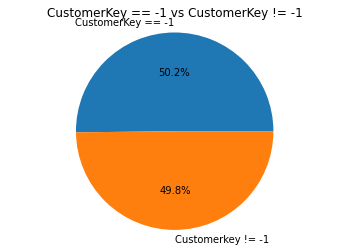

In [ ]:
#Đồ thị thể hiện phần trăm của các khách hàng có customerkey = -1 và các customerKey khác -1 
my_data = [60855,60398]
my_labels = 'CustomerKey == -1', 'Customerkey != -1'
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('CustomerKey == -1 vs CustomerKey != -1')
plt.axis('equal')
plt.show()

In [ ]:
#Bảng thể hiện cột customerKey còn 60398, phù hợp với các giá trị khác -1 
indexCK = sd_df[ (sd_df['CustomerKey'] == -1) ].index
sd_df.drop(indexCK , inplace=True)
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 60855 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SalesOrderLineKey        60398 non-null  float64
 1   ResellerKey              60398 non-null  float64
 2   CustomerKey              60398 non-null  float64
 3   ProductKey               60398 non-null  float64
 4   OrderDateKey             60398 non-null  float64
 5   DueDateKey               60398 non-null  float64
 6   ShipDateKey              59378 non-null  float64
 7   SalesTerritoryKey        60398 non-null  float64
 8   Order Quantity           60398 non-null  float64
 9   Unit Price               60398 non-null  float64
 10  Extended Amount          60398 non-null  float64
 11  Unit Price Discount Pct  60398 non-null  float64
 12  Product Standard Cost    60398 non-null  float64
 13  Total Product Cost       60398 non-null  float64
 14  Sales Amount     

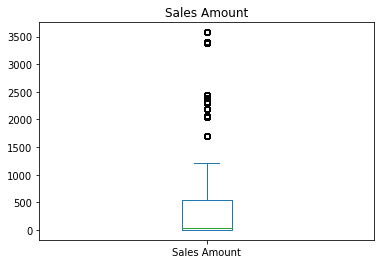

In [ ]:
sd_df['Sales Amount'].plot(kind='box', title='Sales Amount') 

In [ ]:
sd_df.describe()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
count,6.039800e+04,60398.0,60398.000000,60398.000000,6.039800e+04,6.039800e+04,5.937800e+04,60398.000000,60398.0,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000
mean,6.184938e+07,-1.0,18841.685420,437.557932,2.019438e+07,2.019465e+07,2.019447e+07,6.244462,1.0,486.086911,486.086911,0.0,286.065657,286.065657,486.086911
std,8.030547e+06,0.0,5432.430404,118.088390,6.435660e+03,6.432749e+03,6.443396e+03,2.961150,0.0,928.489892,928.489892,0.0,552.457641,552.457641,928.489892
min,4.369700e+07,-1.0,11000.000000,214.000000,2.017070e+07,2.017071e+07,2.017071e+07,1.000000,1.0,2.290000,2.290000,0.0,0.856500,0.856500,2.290000
25%,5.556000e+07,-1.0,14003.000000,359.000000,2.019090e+07,2.019091e+07,2.019091e+07,4.000000,1.0,7.950000,7.950000,0.0,2.973300,2.973300,7.950000
50%,6.210400e+07,-1.0,18143.000000,479.000000,2.019122e+07,2.019122e+07,2.019122e+07,7.000000,1.0,29.990000,29.990000,0.0,11.216300,11.216300,29.990000
75%,6.865000e+07,-1.0,23429.750000,529.000000,2.020032e+07,2.020033e+07,2.020032e+07,9.000000,1.0,539.990000,539.990000,0.0,294.579700,294.579700,539.990000
max,7.512300e+07,-1.0,29483.000000,606.000000,2.020062e+07,2.020062e+07,2.020062e+07,10.000000,1.0,3578.270000,3578.270000,0.0,2171.294200,2171.294200,3578.270000


In [ ]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18485 non-null  float64
 1   Customer ID     18485 non-null  object 
 2   Customer        18485 non-null  object 
 3   City            18485 non-null  object 
 4   State-Province  18485 non-null  object 
 5   Country-Region  18485 non-null  object 
 6   Postal Code     18485 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1011.0+ KB


In [ ]:
#Xóa các customerkey = -1 trong bảng customer data
indexCK = cs_df[ (cs_df['CustomerKey'] == -1) ].index
cs_df.drop(indexCK , inplace=True)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 1 to 18484
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18484 non-null  float64
 1   Customer ID     18484 non-null  object 
 2   Customer        18484 non-null  object 
 3   City            18484 non-null  object 
 4   State-Province  18484 non-null  object 
 5   Country-Region  18484 non-null  object 
 6   Postal Code     18484 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


Use descriptive statistics to remove outliers . values

In [ ]:
print("Highest allowed",sd_df['Sales Amount'].mean() + 3*sd_df['Sales Amount'].std())
print("Lowest allowed",sd_df['Sales Amount'].mean() - 3*sd_df['Sales Amount'].std())

Highest allowed 3271.5565864477276
Lowest allowed -2299.382765437098


In [ ]:
sd_df[(sd_df['Sales Amount'] > 3271.5565864477276) | (sd_df['Sales Amount'] < -2299.382765437098)]

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
60855,43697001.0,-1.0,21768.0,310.0,20170701.0,20170711.0,20170708.0,6.0,1.0,3578.27,3578.27,0.0,2171.2942,2171.2942,3578.27
60856,43698001.0,-1.0,28389.0,346.0,20170701.0,20170711.0,20170708.0,7.0,1.0,3399.99,3399.99,0.0,1912.1544,1912.1544,3399.99
60857,43699001.0,-1.0,25863.0,346.0,20170701.0,20170711.0,20170708.0,1.0,1.0,3399.99,3399.99,0.0,1912.1544,1912.1544,3399.99
60859,43701001.0,-1.0,11003.0,346.0,20170701.0,20170711.0,20170708.0,9.0,1.0,3399.99,3399.99,0.0,1912.1544,1912.1544,3399.99
60860,43702001.0,-1.0,27645.0,311.0,20170701.0,20170711.0,20170708.0,4.0,1.0,3578.27,3578.27,0.0,2171.2942,2171.2942,3578.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63055,46598001.0,-1.0,15080.0,311.0,20180530.0,20180609.0,20180606.0,8.0,1.0,3578.27,3578.27,0.0,2171.2942,2171.2942,3578.27
63056,46599001.0,-1.0,12206.0,310.0,20180530.0,20180609.0,20180606.0,4.0,1.0,3578.27,3578.27,0.0,2171.2942,2171.2942,3578.27
63058,46601001.0,-1.0,26098.0,345.0,20180530.0,20180609.0,20180606.0,4.0,1.0,3399.99,3399.99,0.0,1912.1544,1912.1544,3399.99
63059,46602001.0,-1.0,20823.0,312.0,20180530.0,20180609.0,20180606.0,9.0,1.0,3578.27,3578.27,0.0,2171.2942,2171.2942,3578.27


In [ ]:
new_sd_df = sd_df[(sd_df['Sales Amount'] < 3271.5565864477276) & (sd_df['Sales Amount'] > -2299.382765437098)]
new_sd_df

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
60858,43700001.0,-1.0,14501.0,336.0,20170701.0,20170711.0,20170708.0,4.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
60866,43708001.0,-1.0,20042.0,330.0,20170702.0,20170712.0,20170709.0,10.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
60875,43717001.0,-1.0,25249.0,336.0,20170703.0,20170713.0,20170710.0,9.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
60881,43723001.0,-1.0,14520.0,332.0,20170704.0,20170714.0,20170711.0,1.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
60884,43726001.0,-1.0,14560.0,332.0,20170704.0,20170714.0,20170711.0,4.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.0982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,75122001.0,-1.0,15868.0,485.0,20200615.0,20200625.0,NaN,6.0,1.0,21.9800,21.9800,0.0,8.2205,8.2205,21.9800
121249,75122002.0,-1.0,15868.0,225.0,20200615.0,20200625.0,NaN,6.0,1.0,8.9900,8.9900,0.0,6.9223,6.9223,8.9900
121250,75123001.0,-1.0,18759.0,485.0,20200615.0,20200625.0,NaN,6.0,1.0,21.9800,21.9800,0.0,8.2205,8.2205,21.9800
121251,75123002.0,-1.0,18759.0,486.0,20200615.0,20200625.0,NaN,6.0,1.0,159.0000,159.0000,0.0,59.4660,59.4660,159.0000


In [ ]:
upper_limit = sd_df['Sales Amount'].mean() + 3*sd_df['Sales Amount'].std()
lower_limit = sd_df['Sales Amount'].mean() - 3*sd_df['Sales Amount'].std()

In [ ]:
sd_df['Sales Amount'] = np.where(
   sd_df['Sales Amount']>upper_limit,
    upper_limit,
    np.where(
        sd_df['Sales Amount']<lower_limit,
        lower_limit,
        sd_df['Sales Amount']
    )
)

In [ ]:
sd_df['Sales Amount'].describe()

count    60398.000000
mean       477.455877
std        900.794937
min          2.290000
25%          7.950000
50%         29.990000
75%        539.990000
max       3271.556586
Name: Sales Amount, dtype: float64

## EDA

Identify areas with many buyers

In [ ]:
ter=pd.DataFrame(st_df, columns =['Country', 'Group']).drop_duplicates(subset=['Country'])
cs= pd.DataFrame(cs_df, columns = ['CustomerKey', 'Customer ID', 'Customer', 'Country-Region', 'Postal Code'])
#Gộp 2 bảng Customer với Territory
cs_ter = cs.set_index('Country-Region').join(ter.set_index('Country'))
cs_ter = cs_ter.reset_index()
cs_ter = cs_ter.rename(columns={"index":"Country"})
cs_ter.head()

,Country,CustomerKey,Customer ID,Customer,Postal Code,Group
0,Australia,11000.0,AW00011000,Jon Yang,4700,Pacific
1,Australia,11001.0,AW00011001,Eugene Huang,3198,Pacific
2,Australia,11002.0,AW00011002,Ruben Torres,7001,Pacific
3,Australia,11003.0,AW00011003,Christy Zhu,2113,Pacific
4,Australia,11004.0,AW00011004,Elizabeth Johnson,2500,Pacific


In [ ]:
cs_df.describe(include=['object', 'object'])

,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
count,18484,18484,18484,18484,18484,18484
unique,18484,18400,269,53,6,323
top,AW00011000,Mohamed Pal,London,California,United States,98168
freq,1,3,420,4444,7819,212


In [ ]:
cs_df['Country-Region'].value_counts() 

United States     7819
Australia         3591
United Kingdom    1913
France            1810
Germany           1780
Canada            1571
Name: Country-Region, dtype: int64

In [ ]:
Frequency = cs_df['Country-Region'].value_counts() 

In [ ]:
cs_df['Country-Region'] = Frequency.cumsum()
print(Frequency.cumsum())

United States      7819
Australia         11410
United Kingdom    13323
France            15133
Germany           16913
Canada            18484
Name: Country-Region, dtype: int64


In [ ]:
df1 = {
     'Name':['United States','Australia','United Kingdom','France ','Germany ','Canada '],
   'Math_score':[7819,3591,1913,1810,1780,1571]}


In [ ]:
df1 = pd.DataFrame(df1, columns=['Name','Math_score'])

In [ ]:
df1['cum_percent'] = 100*(df1.Math_score.cumsum() / df1.Math_score.sum())
 
df1

,Name,Math_score,cum_percent
0,United States,7819,42.301450
1,Australia,3591,61.729063
2,United Kingdom,1913,72.078554
3,France,1810,81.870807
4,Germany,1780,91.500757
5,Canada,1571,100.000000


In [ ]:
sd_df.describe()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
count,6.039800e+04,60398.0,60398.000000,60398.000000,6.039800e+04,6.039800e+04,5.937800e+04,60398.000000,60398.0,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000
mean,6.184938e+07,-1.0,18841.685420,437.557932,2.019438e+07,2.019465e+07,2.019447e+07,6.244462,1.0,486.086911,486.086911,0.0,286.065657,286.065657,477.455877
std,8.030547e+06,0.0,5432.430404,118.088390,6.435660e+03,6.432749e+03,6.443396e+03,2.961150,0.0,928.489892,928.489892,0.0,552.457641,552.457641,900.794937
min,4.369700e+07,-1.0,11000.000000,214.000000,2.017070e+07,2.017071e+07,2.017071e+07,1.000000,1.0,2.290000,2.290000,0.0,0.856500,0.856500,2.290000
25%,5.556000e+07,-1.0,14003.000000,359.000000,2.019090e+07,2.019091e+07,2.019091e+07,4.000000,1.0,7.950000,7.950000,0.0,2.973300,2.973300,7.950000
50%,6.210400e+07,-1.0,18143.000000,479.000000,2.019122e+07,2.019122e+07,2.019122e+07,7.000000,1.0,29.990000,29.990000,0.0,11.216300,11.216300,29.990000
75%,6.865000e+07,-1.0,23429.750000,529.000000,2.020032e+07,2.020033e+07,2.020032e+07,9.000000,1.0,539.990000,539.990000,0.0,294.579700,294.579700,539.990000
max,7.512300e+07,-1.0,29483.000000,606.000000,2.020062e+07,2.020062e+07,2.020062e+07,10.000000,1.0,3578.270000,3578.270000,0.0,2171.294200,2171.294200,3271.556586


Is the order over each year increasing or decreasing -> line chart
How many oderquantities per customerkey:

In [ ]:
sd_df['Order Quantity'].value_counts()

1.0    60398
Name: Order Quantity, dtype: int64

In [ ]:
sd_df['OrderDateKey'] = pd.to_datetime(sd_df['OrderDateKey'], format='%Y%m%d')

In [ ]:
sd_df['OrderDateKey'].value_counts()

2020-05-14    263
2020-03-03    246
2019-11-06    241
2020-05-11    238
2020-01-20    237
             ... 
2017-09-24      1
2018-04-28      1
2017-08-30      1
2018-10-04      1
2018-01-21      1
Name: OrderDateKey, Length: 1081, dtype: int64

In [ ]:
sd_df['Sales Amount'].unique()

array([3.27155659e+03, 6.99098200e+02, 1.00043750e+03, 2.18156250e+03,
       7.82990000e+02, 2.04909820e+03, 2.07141960e+03, 2.44335000e+03,
       8.99000000e+00, 1.21485000e+03, 3.49900000e+01, 2.31999000e+03,
       9.99000000e+00, 4.99000000e+00, 3.26000000e+01, 3.99000000e+00,
       1.59000000e+02, 4.99900000e+01, 1.70099000e+03, 3.50000000e+01,
       7.42350000e+02, 2.89900000e+01, 2.38407000e+03, 5.39990000e+02,
       2.14900000e+01, 2.44900000e+01, 2.49900000e+01, 2.29499000e+03,
       2.19800000e+01, 7.69490000e+02, 2.99900000e+01, 1.12049000e+03,
       5.39900000e+01, 5.64990000e+02, 2.29000000e+00, 5.49900000e+01,
       6.35000000e+01, 7.95000000e+00, 1.20000000e+02, 6.99900000e+01])

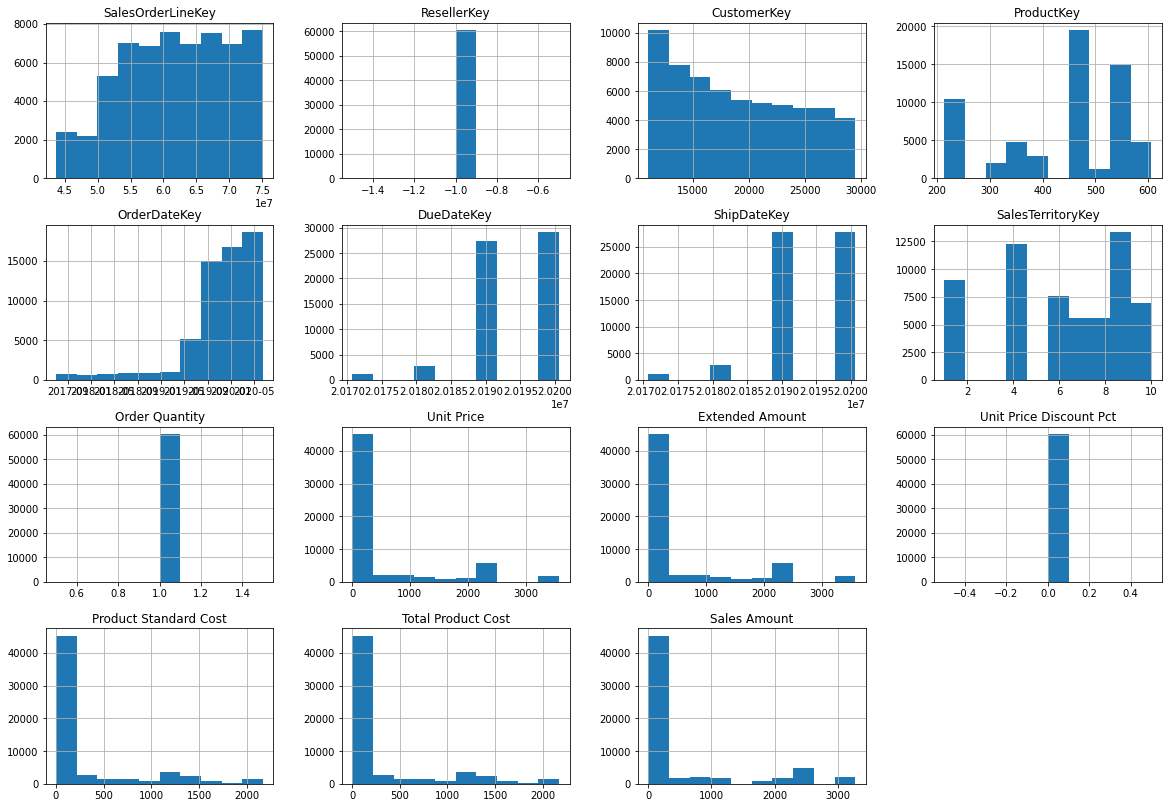

In [ ]:
sd_df.hist(figsize=(20,14))
plt.show()

In [ ]:
pd_df.describe(include=['object', 'object'])

,SKU,Product,Color,Model,Subcategory,Category
count,397,397,341,397,397,397
unique,295,295,9,119,37,4
top,FR-R38B-44,"LL Road Frame - Black, 44",Black,LL Road Frame,Road Frames,Components
freq,3,3,129,30,70,189


In [ ]:
pd_df['Category'].value_counts()

Components     189
Bikes          125
Clothing        48
Accessories     35
Name: Category, dtype: int64

In [ ]:
st_df.describe(include=['object', 'object'])

,Region,Country,Group
count,11,11,11
unique,11,7,4
top,Northwest,United States,North America
freq,1,5,6


In [ ]:
cs_ter.describe(include=['object', 'object'])

,Country,Customer ID,Customer,Postal Code,Group
count,18484,18484,18484,18484,18484
unique,6,18484,18400,323,3
top,United States,AW00011000,Mohamed Pal,94519,North America
freq,7819,1,3,212,9390


In [ ]:
cs_ter.describe()

,CustomerKey
count,18484.000000
mean,20241.500000
std,5336.015523
min,11000.000000
25%,15620.750000
50%,20241.500000
75%,24862.250000
max,29483.000000


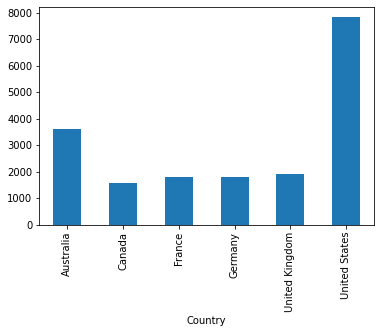

In [ ]:
counum_cs_ter = cs_ter.groupby('Country')['CustomerKey'].count()
groupnum_cs_ter = cs_ter.groupby('Group')['CustomerKey'].count()
# Number of customers by country
counum_cs_ter.plot(x=["Country"], y=["CustomerKey"], kind="bar")

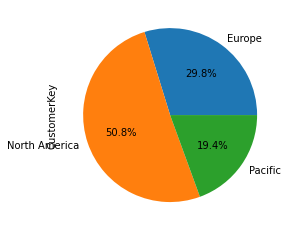

In [ ]:
# Percentage of customers distributed by region
groupnum_cs_ter.plot(x=["Group"], y=["CustomerKey"], kind="pie", autopct='%1.1f%%')

In [ ]:
sa = sd_df.iloc[:, [0,2,3,7,8,14]]
sa_ter = sa.set_index('SalesTerritoryKey').join(st_df.set_index('SalesTerritoryKey'))
sa_ter = sa_ter.reset_index()
sa_ter.head()

,SalesTerritoryKey,SalesOrderLineKey,CustomerKey,ProductKey,Order Quantity,Sales Amount,Region,Country,Group
0,1.0,43699001.0,25863.0,346.0,1.0,3271.556586,Northwest,United States,North America
1,1.0,43711001.0,27606.0,314.0,1.0,3271.556586,Northwest,United States,North America
2,1.0,43718001.0,27668.0,311.0,1.0,3271.556586,Northwest,United States,North America
3,1.0,43723001.0,14520.0,332.0,1.0,699.098200,Northwest,United States,North America
4,1.0,43733001.0,27577.0,312.0,1.0,3271.556586,Northwest,United States,North America


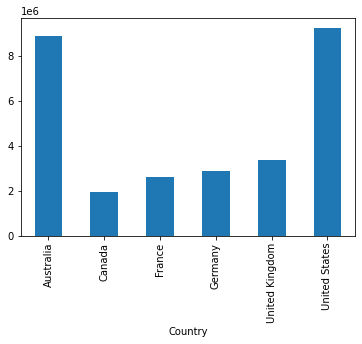

In [ ]:
coun_am_sa_ter = sa_ter.groupby('Country')['Sales Amount'].sum()
group_am_sa_ter = sa_ter.groupby('Group')['Sales Amount'].sum()
# The graph shows the total amount of purchases in the countries
coun_am_sa_ter.plot(x=["Country"], y=["Sales Amount"], kind="bar")

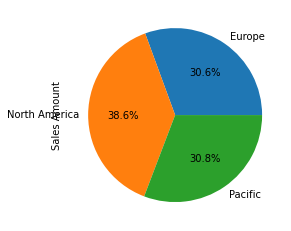

In [ ]:
# Biểu đồ thể hiện tỉ lệ mua hàng tại các châu lục 
group_am_sa_ter.plot(x=["Group"], y=["Sales Amount"], kind="pie", autopct='%1.1f%%')

Find out which products have the most customers to buy

In [ ]:
#Tổng quan các sản phẩm mà Business bán 
pd_df_new = pd_df.iloc[:, [0,7,8]]
pd_df_new

,ProductKey,Subcategory,Category
0,210.0,Road Frames,Components
1,211.0,Road Frames,Components
2,212.0,Helmets,Accessories
3,213.0,Helmets,Accessories
4,214.0,Helmets,Accessories
...,...,...,...
392,602.0,Bottom Brackets,Components
393,603.0,Bottom Brackets,Components
394,604.0,Road Bikes,Bikes
395,605.0,Road Bikes,Bikes


In [ ]:
# Product classification of Business
pd_group = pd_df.groupby(by=['Category'], dropna=False).sum()
pd_group

,ProductKey,Standard Cost,List Price
Category,,,
Accessories,14785.0,461.3922,1197.9852
Bikes,53945.0,113353.2413,190574.2218
Clothing,18401.0,1151.4070,2257.1711
Components,74845.0,58306.2303,104160.0180


In [ ]:
# Combine sales_data and product_data tables to use
df_mix2 = sd_df.merge(pd_df, how='left', on='ProductKey')
df_mix2.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,...,Total Product Cost,Sales Amount,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
0,43697001.0,-1.0,21768.0,310.0,2017-07-01,20170711.0,20170708.0,6.0,1.0,3578.2700,...,2171.2942,3271.556586,BK-R93R-62,"Road-150 Red, 62",2171.2942,Red,3578.2700,Road-150,Road Bikes,Bikes
1,43698001.0,-1.0,28389.0,346.0,2017-07-01,20170711.0,20170708.0,7.0,1.0,3399.9900,...,1912.1544,3271.556586,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes
2,43699001.0,-1.0,25863.0,346.0,2017-07-01,20170711.0,20170708.0,1.0,1.0,3399.9900,...,1912.1544,3271.556586,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes
3,43700001.0,-1.0,14501.0,336.0,2017-07-01,20170711.0,20170708.0,4.0,1.0,699.0982,...,413.1463,699.098200,BK-R50B-62,"Road-650 Black, 62",413.1463,Black,699.0982,Road-650,Road Bikes,Bikes
4,43701001.0,-1.0,11003.0,346.0,2017-07-01,20170711.0,20170708.0,9.0,1.0,3399.9900,...,1912.1544,3271.556586,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes


In [ ]:
#Ở đây ta thấy được công ty có 3 mặt hàng chính
sum_Sales_amount = df_mix2.groupby('Category')['Sales Amount'].sum()
sum_Sales_amount

Category
Accessories    7.007600e+05
Bikes          2.779685e+07
Clothing       3.397726e+05
Name: Sales Amount, dtype: float64

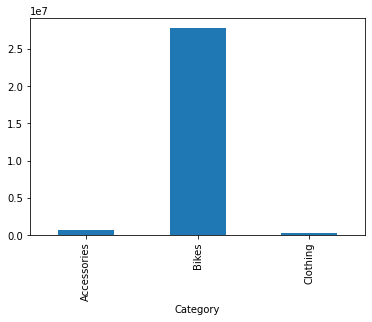

In [ ]:
#Vẽ biểu đồ cột thể hiện doanh thu thu được từ các loại hàng
sum_Sales_amount.plot(x="Category", y=["Sales Amount"], kind="bar")

In [ ]:
pd_group2 = pd_df.groupby(by=['Subcategory'], dropna=False).sum()
pd_group2

,ProductKey,Standard Cost,List Price
Subcategory,,,
Bib-Shorts,1380.0,111.3627,269.9700
Bike Racks,483.0,44.8800,120.0000
Bike Stands,486.0,59.4660,159.0000
Bottles and Cages,1434.0,8.9649,23.9700
Bottom Brackets,1806.0,122.8638,276.7200
Brakes,1069.0,94.5720,213.0000
Caps,672.0,17.8572,26.2784
Chains,559.0,8.9866,20.2400
Cleaners,484.0,2.9733,7.9500


In [ ]:
sum_Sales_amount2 = df_mix2.groupby('Subcategory')['Sales Amount'].sum()
sum_Sales_amount2

Subcategory
Bike Racks           3.936000e+04
Bike Stands          3.959100e+04
Bottles and Cages    5.679819e+04
Caps                 1.968810e+04
Cleaners             7.218600e+03
Fenders              4.661958e+04
Gloves               3.502070e+04
Helmets              2.253356e+05
Hydration Packs      4.030767e+04
Jerseys              1.729507e+05
Mountain Bikes       9.907175e+06
Road Bikes           1.404487e+07
Shorts               7.131981e+04
Socks                5.106320e+03
Tires and Tubes      2.455293e+05
Touring Bikes        3.844801e+06
Vests                3.568700e+04
Name: Sales Amount, dtype: float64

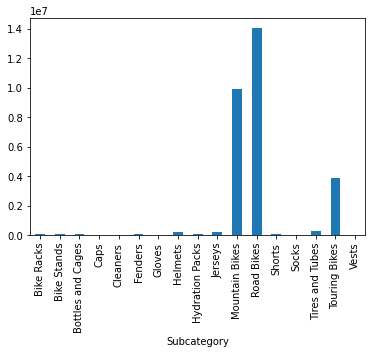

In [ ]:
#Thể hiện doanh thu đối với các mặt hàng cụ thể  
sum_Sales_amount2.plot(x="Subcategory", y=["Sales Amount"], kind="bar")

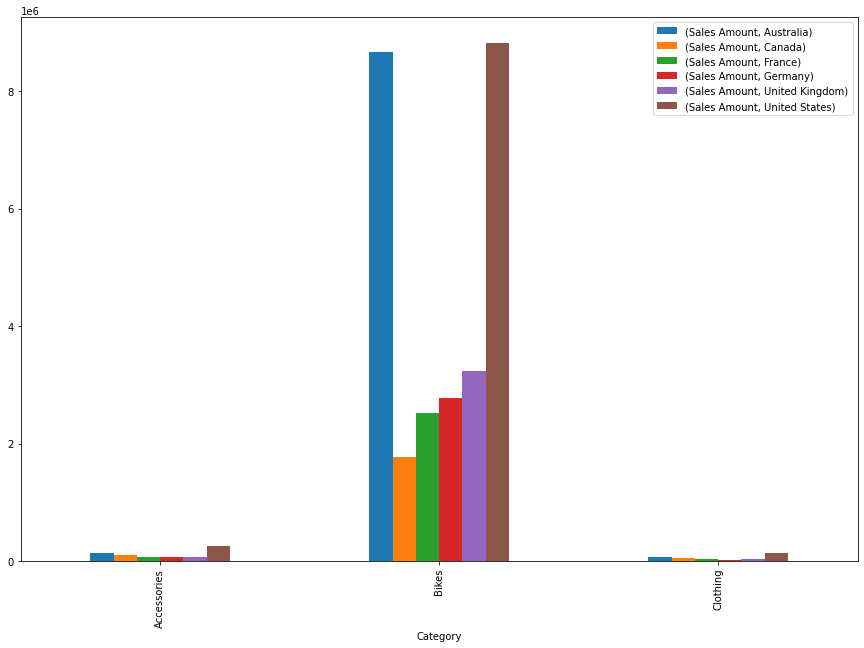

In [ ]:
# Bảng tính tổng lượng bán ra theo Category theo Country
sa_ter_pd = sa_ter.set_index('ProductKey').join(pd_df.set_index('ProductKey'))
sa_ter_pd = sa_ter_pd.reset_index()
sa_ter_pdfn = pd.DataFrame(sa_ter_pd, columns = ['Sales Amount', 'Category', 'Country' ])
table = pd.pivot_table(data=sa_ter_pdfn,index=['Category'],columns=['Country'],values=['Sales Amount'], aggfunc=np.sum  )
table.plot(kind='bar', figsize =(15,10))
plt.legend(["Australia", "Canada", "France", 'Germany', 'United Kingdom', 'United States'])
plt.legend(loc='upper right')

Số lượng bán hàng theo tháng 

In [ ]:
import datetime

In [ ]:
#Chuyển kiểu ngày
df_mix2['OrderDateKey'] = pd.to_datetime(df_mix2['OrderDateKey'], format='%Y%m%d')

In [ ]:
df_mix2['month_year'] = df_mix2['OrderDateKey'].dt.strftime('%m-%Y')
df_mix2['year'] = df_mix2['OrderDateKey'].dt.strftime('%Y')
df_mix2.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,...,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category,month_year,year
0,43697001.0,-1.0,21768.0,310.0,2017-07-01,20170711.0,20170708.0,6.0,1.0,3578.2700,...,BK-R93R-62,"Road-150 Red, 62",2171.2942,Red,3578.2700,Road-150,Road Bikes,Bikes,07-2017,2017
1,43698001.0,-1.0,28389.0,346.0,2017-07-01,20170711.0,20170708.0,7.0,1.0,3399.9900,...,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes,07-2017,2017
2,43699001.0,-1.0,25863.0,346.0,2017-07-01,20170711.0,20170708.0,1.0,1.0,3399.9900,...,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes,07-2017,2017
3,43700001.0,-1.0,14501.0,336.0,2017-07-01,20170711.0,20170708.0,4.0,1.0,699.0982,...,BK-R50B-62,"Road-650 Black, 62",413.1463,Black,699.0982,Road-650,Road Bikes,Bikes,07-2017,2017
4,43701001.0,-1.0,11003.0,346.0,2017-07-01,20170711.0,20170708.0,9.0,1.0,3399.9900,...,BK-M82S-44,"Mountain-100 Silver, 44",1912.1544,Silver,3399.9900,Mountain-100,Mountain Bikes,Bikes,07-2017,2017


In [ ]:
time= pd.DataFrame(df_mix2, columns =['month_year','Sales Amount'])
Time1= time.groupby(['month_year'], sort = False).sum().reset_index()
Time1.head()

,month_year,Sales Amount
0,07-2017,865733.643504
1,08-2017,479018.163062
2,09-2017,475271.442689
3,10-2017,520374.136699
4,11-2017,683001.638449


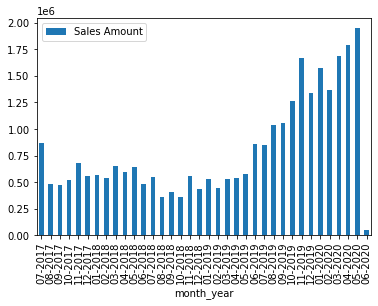

In [ ]:
#Doanh thu theo tháng của Business 
Time1.plot(x="month_year", y=["Sales Amount"], kind="bar")

## create df for rfm

In [ ]:
indexCK = sd_df[ (sd_df['CustomerKey'] == -1) ].index
sd_df.drop(indexCK , inplace=True)
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 60855 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SalesOrderLineKey        60398 non-null  float64       
 1   ResellerKey              60398 non-null  float64       
 2   CustomerKey              60398 non-null  float64       
 3   ProductKey               60398 non-null  float64       
 4   OrderDateKey             60398 non-null  datetime64[ns]
 5   DueDateKey               60398 non-null  float64       
 6   ShipDateKey              59378 non-null  float64       
 7   SalesTerritoryKey        60398 non-null  float64       
 8   Order Quantity           60398 non-null  float64       
 9   Unit Price               60398 non-null  float64       
 10  Extended Amount          60398 non-null  float64       
 11  Unit Price Discount Pct  60398 non-null  float64       
 12  Product Standard Cost    60

In [ ]:
# Create the dataframe for RFM
df_mix = sd_df.merge(sod_df, how='left', on='SalesOrderLineKey')
df_mix.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount,Channel,Sales Order,Sales Order Line
0,43697001.0,-1.0,21768.0,310.0,2017-07-01,20170711.0,20170708.0,6.0,1.0,3578.2700,3578.2700,0.0,2171.2942,2171.2942,3271.556586,Internet,SO43697,SO43697 - 1
1,43698001.0,-1.0,28389.0,346.0,2017-07-01,20170711.0,20170708.0,7.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3271.556586,Internet,SO43698,SO43698 - 1
2,43699001.0,-1.0,25863.0,346.0,2017-07-01,20170711.0,20170708.0,1.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3271.556586,Internet,SO43699,SO43699 - 1
3,43700001.0,-1.0,14501.0,336.0,2017-07-01,20170711.0,20170708.0,4.0,1.0,699.0982,699.0982,0.0,413.1463,413.1463,699.098200,Internet,SO43700,SO43700 - 1
4,43701001.0,-1.0,11003.0,346.0,2017-07-01,20170711.0,20170708.0,9.0,1.0,3399.9900,3399.9900,0.0,1912.1544,1912.1544,3271.556586,Internet,SO43701,SO43701 - 1


In [ ]:
df_rfm = df_mix[['CustomerKey', 'OrderDateKey','Sales Amount']]
df_rfm['OrderDateKey'] = pd.to_datetime(df_mix['OrderDateKey'], format='%Y%m%d')
print(df_rfm)


       CustomerKey OrderDateKey  Sales Amount
0          21768.0   2017-07-01   3271.556586
1          28389.0   2017-07-01   3271.556586
2          25863.0   2017-07-01   3271.556586
3          14501.0   2017-07-01    699.098200
4          11003.0   2017-07-01   3271.556586
...            ...          ...           ...
60393      15868.0   2020-06-15     21.980000
60394      15868.0   2020-06-15      8.990000
60395      18759.0   2020-06-15     21.980000
60396      18759.0   2020-06-15    159.000000
60397      18759.0   2020-06-15      8.990000

[60398 rows x 3 columns]


<ipython-input-81-b14ba01e7cbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['OrderDateKey'] = pd.to_datetime(df_mix['OrderDateKey'], format='%Y%m%d')


In [ ]:
def check_df(df_rfm):
    print("################ Shape ####################")
    print(df_rfm.shape)
    print("############### Columns ###################")
    print(df_rfm.columns)
    print("############### Types #####################")
    print(df_rfm.dtypes)
    print("############### Head ######################")
    print(df_rfm.head())
    print("############### Tail ######################")
    print(df_rfm.tail())
    print("############### Describe ###################")
    print(df_rfm.describe().T)

check_df(df_rfm)

################ Shape ####################
(60398, 3)
############### Columns ###################
Index(['CustomerKey', 'OrderDateKey', 'Sales Amount'], dtype='object')
############### Types #####################
CustomerKey            float64
OrderDateKey    datetime64[ns]
Sales Amount           float64
dtype: object
############### Head ######################
   CustomerKey OrderDateKey  Sales Amount
0      21768.0   2017-07-01   3271.556586
1      28389.0   2017-07-01   3271.556586
2      25863.0   2017-07-01   3271.556586
3      14501.0   2017-07-01    699.098200
4      11003.0   2017-07-01   3271.556586
############### Tail ######################
       CustomerKey OrderDateKey  Sales Amount
60393      15868.0   2020-06-15         21.98
60394      15868.0   2020-06-15          8.99
60395      18759.0   2020-06-15         21.98
60396      18759.0   2020-06-15        159.00
60397      18759.0   2020-06-15          8.99
############### Describe ###################
                co

In [ ]:
df_rfm.isnull().sum()

CustomerKey     0
OrderDateKey    0
Sales Amount    0
dtype: int64

In [ ]:
df_rfm.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_rfm["CustomerKey"].nunique()

18484

In [ ]:
df_rfm["Sales Amount"].nunique()

40

In [ ]:
df_rfm["CustomerKey"].value_counts()

11185.0    68
11300.0    67
11277.0    65
11262.0    63
11287.0    62
           ..
21674.0     1
25509.0     1
27947.0     1
12312.0     1
11476.0     1
Name: CustomerKey, Length: 18484, dtype: int64

In [ ]:
df_rfm.groupby("CustomerKey").agg({"Sales Amount":"sum"}).sort_values("Sales Amount", ascending=False).head(5)

,Sales Amount
CustomerKey,
12301.0,12988.666586
12132.0,12987.556586
12308.0,12962.556586
12131.0,12959.276586
12300.0,12935.986586


In [ ]:
df_rfm.describe()

,CustomerKey,Sales Amount
count,60398.000000,60398.000000
mean,18841.685420,477.455877
std,5432.430404,900.794937
min,11000.000000,2.290000
25%,14003.000000,7.950000
50%,18143.000000,29.990000
75%,23429.750000,539.990000
max,29483.000000,3271.556586


**Scale và normalized tiền các biến RFM**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


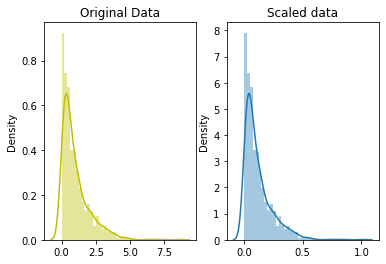

In [ ]:
# set seed for reproducibility
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution
df_rfm= np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scale(df_rfm)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_rfm, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

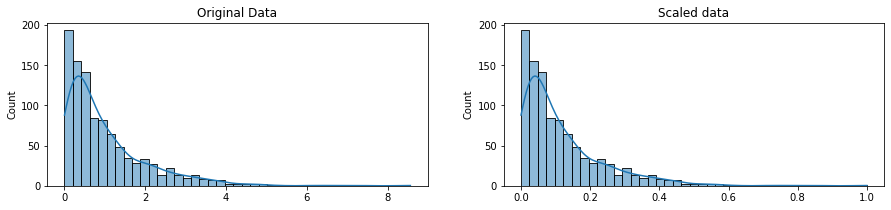

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scale(df_rfm)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_rfm, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Normalized

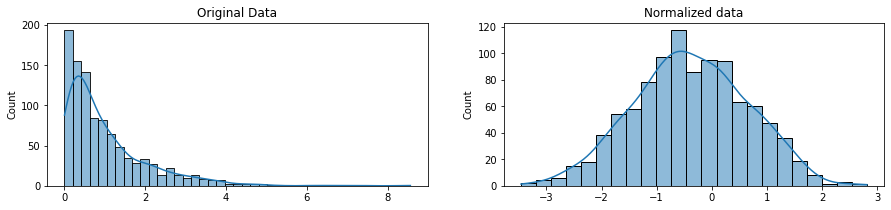

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df_rfm)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_rfm, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

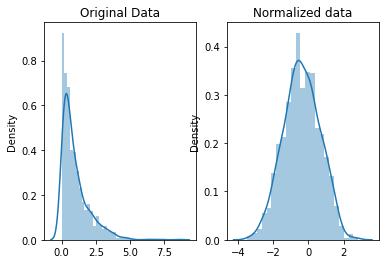

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df_rfm)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_rfm, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

# Tính RFM

**phan R**

In [ ]:
df_rfm['OrderDateKey']=pd.to_datetime(df_rfm['OrderDateKey'])

<ipython-input-82-bc2d7642aa54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['OrderDateKey']=pd.to_datetime(df_rfm['OrderDateKey'])


In [ ]:
print(f'Oldest date is  {df_rfm.OrderDateKey.min()}\n')
print(f'Latest date is  {df_rfm.OrderDateKey.max()}')

Oldest date is  2017-07-01 00:00:00

Latest date is  2020-06-15 00:00:00


In [ ]:
import datetime

# Dạng datetime
date_time_now = datetime.datetime(2021,12,7)

# Dạng timestamp
timestamp_now = date_time_now.timestamp()
print(timestamp_now)

1638835200.0


In [ ]:
timestamp_to_datetime = datetime.datetime.fromtimestamp(timestamp_now)
print(timestamp_to_datetime)

2021-12-07 00:00:00


In [ ]:
recency = df_rfm.groupby('CustomerKey')['OrderDateKey'].max().reset_index()

In [ ]:
recency = recency.assign(Current_Date = timestamp_to_datetime)


In [ ]:
recency['Recency'] = recency.OrderDateKey.apply(lambda x: (timestamp_to_datetime - x).days)

In [ ]:
recency.head()


,CustomerKey,OrderDateKey,Current_Date,Recency
0,11000.0,2019-10-04,2021-12-07,795
1,11001.0,2020-05-12,2021-12-07,574
2,11002.0,2019-07-27,2021-12-07,864
3,11003.0,2019-10-11,2021-12-07,788
4,11004.0,2019-10-02,2021-12-07,797


In [ ]:
recency.drop(['OrderDateKey','Current_Date'], axis=1, inplace=True)


**phan F**

In [ ]:
frequency = df_rfm.groupby('CustomerKey').OrderDateKey.nunique().reset_index().rename(columns={'OrderDateKey':'Frequency'})

In [ ]:
frequency.head()

,CustomerKey,Frequency
0,11000.0,3
1,11001.0,3
2,11002.0,3
3,11003.0,3
4,11004.0,3


**phan M**

In [ ]:
df_rfm

,CustomerKey,OrderDateKey,Sales Amount
0,21768.0,2017-07-01,3271.556586
1,28389.0,2017-07-01,3271.556586
2,25863.0,2017-07-01,3271.556586
3,14501.0,2017-07-01,699.098200
4,11003.0,2017-07-01,3271.556586
...,...,...,...
60393,15868.0,2020-06-15,21.980000
60394,15868.0,2020-06-15,8.990000
60395,18759.0,2020-06-15,21.980000
60396,18759.0,2020-06-15,159.000000


In [ ]:
recency

,CustomerKey,Recency
0,11000.0,795
1,11001.0,574
2,11002.0,864
3,11003.0,788
4,11004.0,797
...,...,...
18479,29479.0,1036
18480,29480.0,720
18481,29481.0,1424
18482,29482.0,1022


In [ ]:
monetary = df_rfm.groupby("CustomerKey").agg({"Sales Amount":"sum"}).rename(columns={"Sales Amount":"Monetary"})
monetary.head()

,Monetary
CustomerKey,
11000.0,8120.556586
11001.0,6280.446586
11002.0,7985.606586
11003.0,8010.856586
11004.0,8067.576586


**tao bang RFM**

In [ ]:
temp_ = recency.merge(frequency, on='CustomerKey')
rfm_table = temp_.merge(monetary, on='CustomerKey')

In [ ]:
rfm_table.set_index('CustomerKey',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerKey,,,
11000.0,795,3,8120.556586
11001.0,574,3,6280.446586
11002.0,864,3,7985.606586
11003.0,788,3,8010.856586
11004.0,797,3,8067.576586


**Check lai du lieu va chuan hoa RFM**

In [ ]:
df_rfm[df_rfm.CustomerKey == rfm_table.index[0]]

,CustomerKey,OrderDateKey,Sales Amount
96,11000.0,2017-07-12,3271.556586
6396,11000.0,2019-06-21,2319.990000
6397,11000.0,2019-06-21,21.980000
19223,11000.0,2019-10-04,2384.070000
19224,11000.0,2019-10-04,28.990000
19225,11000.0,2019-10-04,4.990000
19226,11000.0,2019-10-04,34.990000
19227,11000.0,2019-10-04,53.990000


phan khuc KH = RFM score

In [ ]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 611.0, 0.5: 693.0, 0.75: 788.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 49.97, 0.5: 270.265, 0.75: 2511.275}}

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerKey,,,,,,
11000.0,795,3,8120.556586,1,4,4
11001.0,574,3,6280.446586,4,4,4
11002.0,864,3,7985.606586,1,4,4
11003.0,788,3,8010.856586,2,4,4
11004.0,797,3,8067.576586,1,4,4


In [ ]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerKey,,,,,,,
11000.0,795,3,8120.556586,1,4,4,144
11001.0,574,3,6280.446586,4,4,4,444
11002.0,864,3,7985.606586,1,4,4,144
11003.0,788,3,8010.856586,2,4,4,244
11004.0,797,3,8067.576586,1,4,4,144


Best Recency score = 4 (most recently purchase)

Best Frequency score = 4 (most frequently purchase)

Best Monetary score = 4 (who spent the most)

In [ ]:
rfm_segment[rfm_segment['RFMScore'] == '441'].head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerKey,,,,,,,
11149.0,585,3,41.26,4,4,1,441
11463.0,571,3,47.92,4,4,1,441
11749.0,554,3,47.92,4,4,1,441
11913.0,558,3,41.26,4,4,1,441
12666.0,555,3,34.56,4,4,1,441


# **Cohort**

In [ ]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
df_rfm['InvoiceMonth'] = df_rfm['OrderDateKey'].apply(get_month)
grouping = df_rfm.groupby('CustomerKey')['InvoiceMonth']
df_rfm['CohortMonth'] = grouping.transform('min')
df_rfm.tail()

<ipython-input-105-8c0af0518f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['InvoiceMonth'] = df_rfm['OrderDateKey'].apply(get_month)
<ipython-input-105-8c0af0518f93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['CohortMonth'] = grouping.transform('min')


,CustomerKey,OrderDateKey,Sales Amount,InvoiceMonth,CohortMonth
60393,15868.0,2020-06-15,21.98,2020-06-01,2019-10-01
60394,15868.0,2020-06-15,8.99,2020-06-01,2019-10-01
60395,18759.0,2020-06-15,21.98,2020-06-01,2019-10-01
60396,18759.0,2020-06-15,159.00,2020-06-01,2019-10-01
60397,18759.0,2020-06-15,8.99,2020-06-01,2019-10-01


In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df_rfm,'OrderDateKey')
cohort_year,cohort_month,_ = get_month_int(df_rfm,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df_rfm['CohortIndex'] = year_diff * 12 + month_diff + 1 

<ipython-input-106-6d32d31f4c52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['CohortIndex'] = year_diff * 12 + month_diff + 1


In [ ]:
#Count monthly active customers from each cohort
grouping = df_rfm.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerKey'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerKey')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2017-07-01,289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,20.0,29.0,34.0,21.0,27.0,10.0,16.0,54.0,57.0
2017-08-01,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,6.0,19.0,24.0,16.0,18.0,13.0,10.0,26.0,NaN
2017-09-01,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,26.0,25.0,18.0,15.0,19.0,3.0,27.0,NaN,NaN
2017-10-01,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,11.0,11.0,12.0,23.0,12.0,4.0,NaN,NaN,NaN
2017-11-01,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,18.0,10.0,24.0,17.0,22.0,NaN,NaN,NaN,NaN
2017-12-01,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,14.0,19.0,19.0,10.0,NaN,NaN,NaN,NaN,NaN
2018-01-01,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,17.0,9.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


another cohort

In [ ]:
from operator import attrgetter

df_rfm['order_purchase_timestamp'] = pd.to_datetime(df_rfm['OrderDateKey'])

df_rfm['order_months'] = df_rfm['OrderDateKey'].dt.to_period('M')
df_rfm['cohorts'] = df_rfm.groupby('CustomerKey')['order_months'].transform('min')

cohorts_data = df_rfm.reset_index()\
                     .groupby(['cohorts', 'order_months'])\
                     .agg(ClientsCount = ('CustomerKey', 'nunique'),
                          Revenue = ('Sales Amount', 'sum'),
                          Orders = ('OrderDateKey', 'count'))\
                     .reset_index()

cohorts_data['periods'] = (cohorts_data.order_months - cohorts_data.cohorts).apply(attrgetter('n')) # periods for which the client have stayed

cohorts_data.head()

<ipython-input-108-a519f07b7001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['order_purchase_timestamp'] = pd.to_datetime(df_rfm['OrderDateKey'])
<ipython-input-108-a519f07b7001>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['order_months'] = df_rfm['OrderDateKey'].dt.to_period('M')
<ipython-input-108-a519f07b7001>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,cohorts,order_months,ClientsCount,Revenue,Orders,periods
0,2017-07,2017-07,289,865733.643504,289,0
1,2017-07,2019-05,1,2514.930000,4,22
2,2017-07,2019-06,30,71932.160000,87,23
3,2017-07,2019-07,16,28552.560000,59,24
4,2017-07,2019-08,23,39503.550000,54,25


In [ ]:
import warnings
warnings.filterwarnings('ignore')

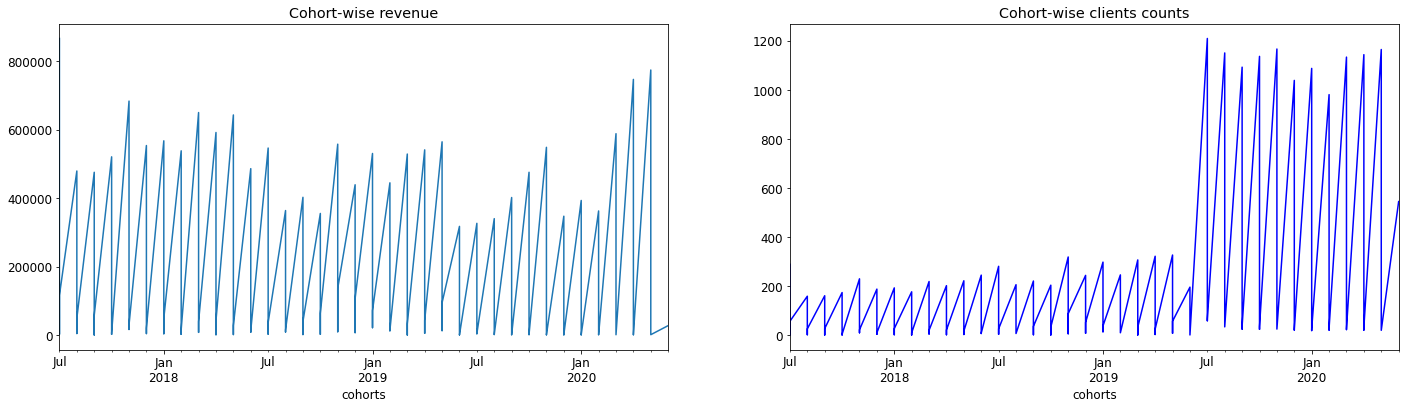

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6)) # for 2 parrallel plots

cohorts_data.set_index('cohorts').Revenue.plot(ax=ax1)
ax1.set_title('Cohort-wise revenue')

cohorts_data.set_index('cohorts').ClientsCount.plot(ax=ax2, c='b')
ax2.set_title('Cohort-wise clients counts');

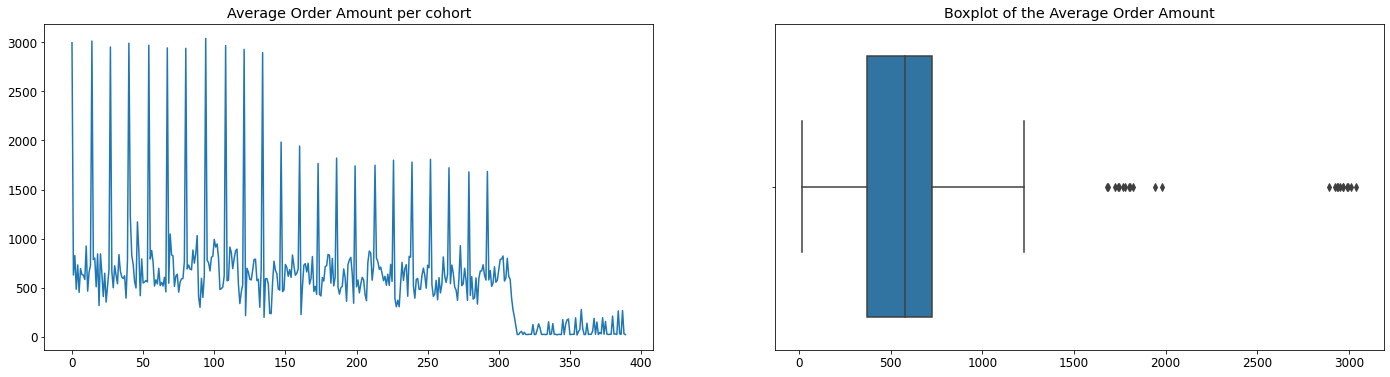

In [ ]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))

(cohorts_data['Revenue']/cohorts_data['Orders']).plot(ax=ax1)
ax1.set_title('Average Order Amount per cohort')

sns.boxplot((cohorts_data['Revenue']/cohorts_data['Orders']), ax=ax2)
ax2.set_title('Boxplot of the Average Order Amount');

**Retention Rate Table**

In [ ]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2017-07-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,6.9,10.0,11.8,7.3,9.3,3.5,5.5,18.7,19.7
2017-08-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,3.8,11.9,15.1,10.1,11.3,8.2,6.3,16.4,NaN
2017-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,16.1,15.5,11.2,9.3,11.8,1.9,16.8,NaN,NaN
2017-10-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.6,6.3,6.3,6.9,13.2,6.9,2.3,NaN,NaN,NaN
2017-11-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.2,7.8,4.3,10.4,7.4,9.6,NaN,NaN,NaN,NaN
2017-12-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,7.4,10.1,10.1,5.3,NaN,NaN,NaN,NaN,NaN
2018-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,8.8,4.7,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.1,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


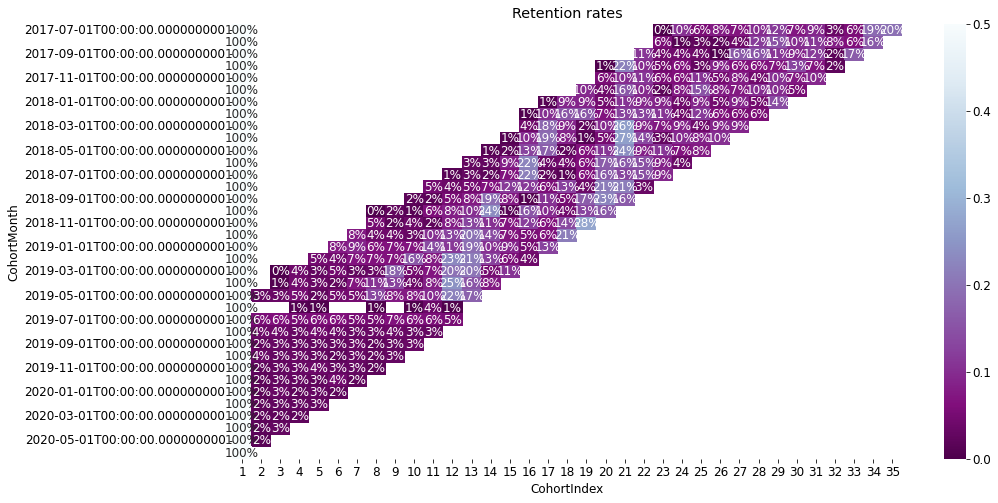

In [ ]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

another retention

# K-means

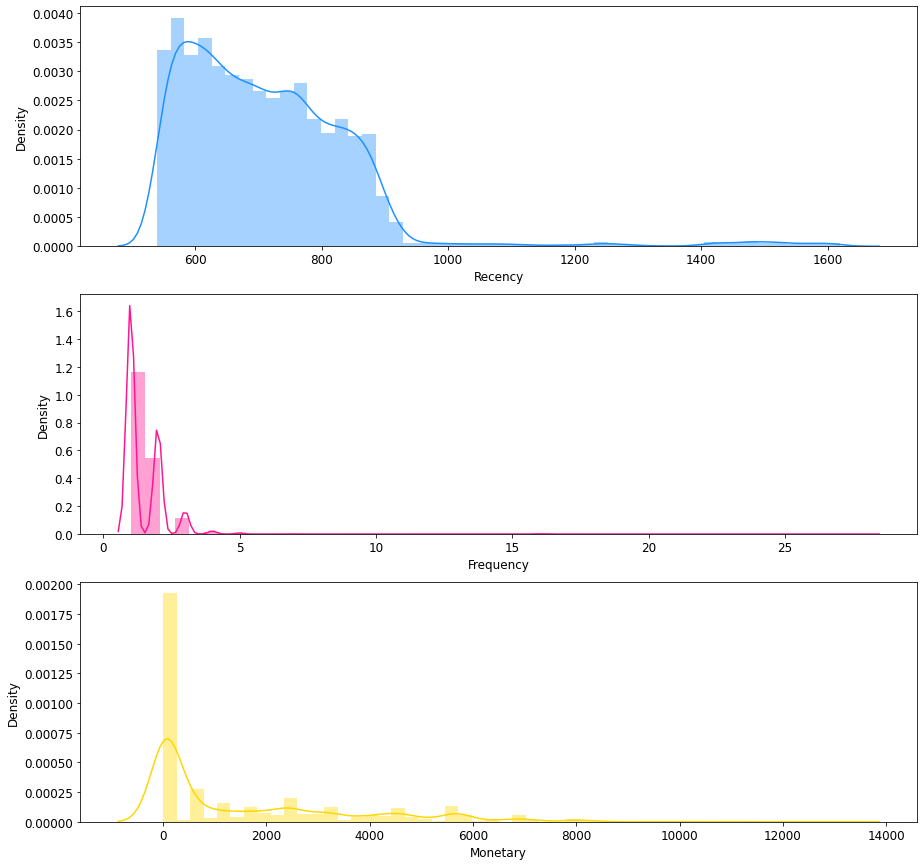

In [ ]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

*NX*: đồ thị đang bị high skew do đó cần chuẩn hóa

**chuẩn hóa RFM_table**

In [ ]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,18484.000000,18484.000000,18484.000000
mean,714.667983,1.494049,1560.126601
std,145.644062,1.070636,2073.657531
min,540.000000,1.000000,2.290000
25%,611.000000,1.000000,49.970000
50%,693.000000,1.000000,270.265000
75%,788.000000,2.000000,2511.275000
max,1620.000000,28.000000,12988.666586


In [ ]:
# Create a copy of rfm table
rfm_table_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Frequency	 = rfm_table_scaled.Frequency	 + abs(rfm_table_scaled.Frequency	.min()) + 1
# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,18484.000000,18484.000000,18484.000000
mean,1255.667983,3.494049,1563.416601
std,145.644062,1.070636,2073.657531
min,1081.000000,3.000000,5.580000
25%,1152.000000,3.000000,53.260000
50%,1234.000000,3.000000,273.555000
75%,1329.000000,4.000000,2514.565000
max,2161.000000,30.000000,12991.956586


In [ ]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

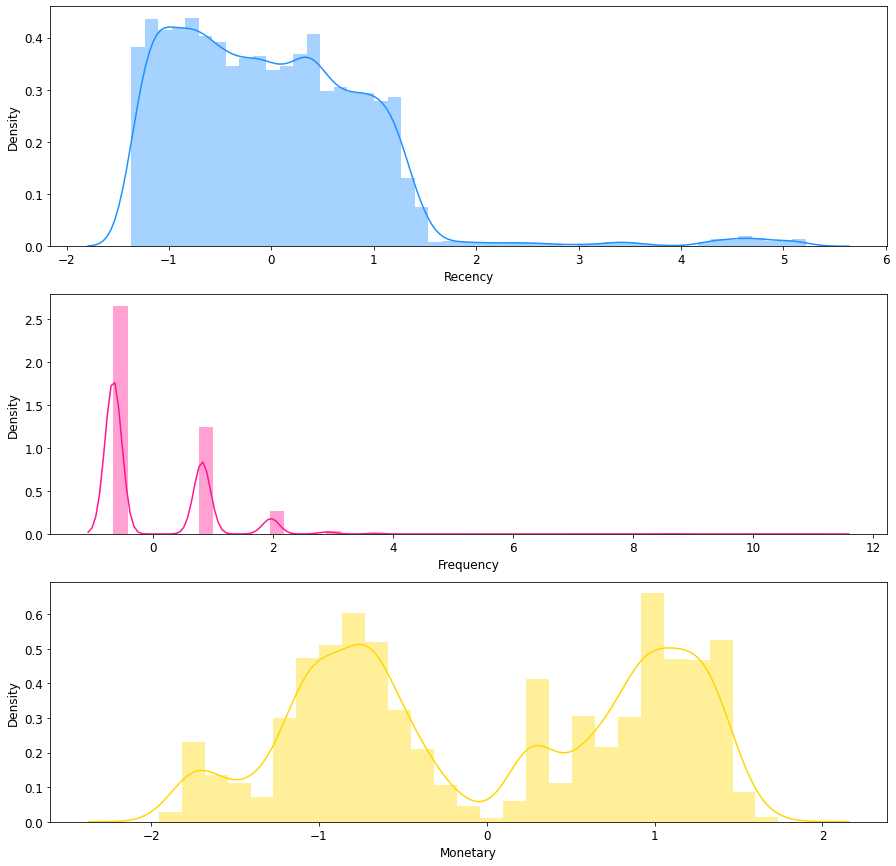

In [ ]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

**vào kmeans**

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

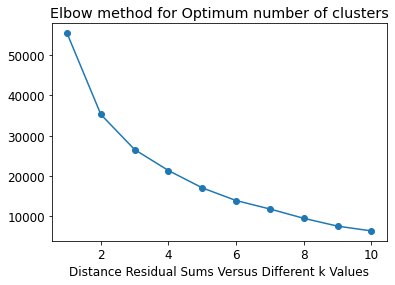

In [ ]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")


Silhouette score for number of cluster(s) 2: 0.39485720702736093
Silhouette score for number of cluster(s) 3: 0.3540343407496657
Silhouette score for number of cluster(s) 4: 0.3816051710003044
Silhouette score for number of cluster(s) 5: 0.4000493003059349
Silhouette score for number of cluster(s) 6: 0.4386128439739165
Silhouette score for number of cluster(s) 7: 0.4515230012472086
Silhouette score for number of cluster(s) 8: 0.4447780309740943
Silhouette score for number of cluster(s) 9: 0.461370005826815
Silhouette score for number of cluster(s) 10: 0.4846535378346434


Silhouette score for number of cluster(s) 11: 0.4518096952686944


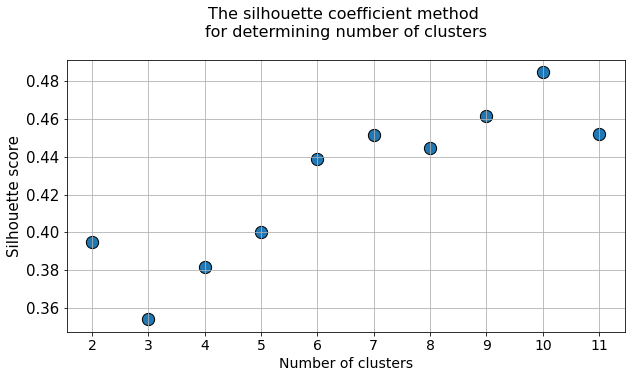

In [ ]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

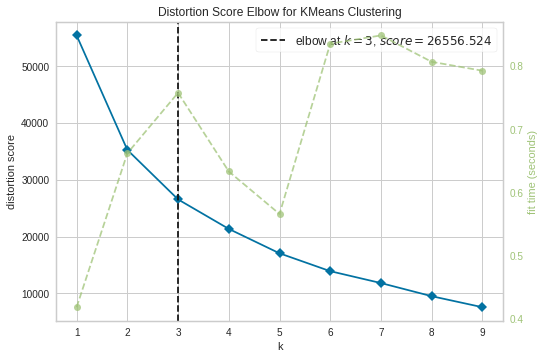

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(normal_df)
visu.poof();

# => chon k=3 do k=3 la so nho nhat



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [ ]:
kmeans

KMeans(n_clusters=3, random_state=1)

In [ ]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (18484,)
Shape of RFM segment dataframe is (18484, 7)


In [ ]:
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [ ]:
print("Số lượng khách hàng ở mỗi cụm  \n",Cluster_table.Cluster.value_counts())

Số lượng khách hàng ở mỗi cụm  
 2    7736
0    5493
1    5255
Name: Cluster, dtype: int64


In [ ]:
Cluster_table.sample(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster
CustomerKey,,,,,,,,
15055.0,718,2,3871.536586,2,3,4,234,0
16008.0,548,1,4.990000,4,1,1,411,2
18746.0,853,2,5828.376586,1,3,4,134,0
29472.0,674,1,88.980000,3,1,2,312,2
25181.0,855,1,32.600000,1,1,1,111,1
19878.0,576,1,69.990000,4,1,2,412,2
22967.0,682,1,69.970000,3,1,2,312,2
15696.0,740,1,198.990000,2,1,2,212,1
20927.0,604,1,101.940000,4,1,2,412,2


In [ ]:
Cluster_table['Segment'] = pd.cut(Cluster_table['Cluster'].rank(pct=True), 
                             bins=3, labels=["Irregular",'Loyal','New'])

In [ ]:
Cluster_table.describe()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,714.667983,1.494049,1560.126601,2.506005,1.818383,2.498864,1.121348
std,145.644062,1.070636,2073.657531,1.120272,1.093362,1.119079,0.837265
min,540.000000,1.000000,2.290000,1.000000,1.000000,1.000000,0.000000
25%,611.000000,1.000000,49.970000,2.000000,1.000000,1.000000,0.000000
50%,693.000000,1.000000,270.265000,3.000000,1.000000,2.500000,1.000000
75%,788.000000,2.000000,2511.275000,4.000000,3.000000,3.250000,2.000000
max,1620.000000,28.000000,12988.666586,4.000000,4.000000,4.000000,2.000000


In [ ]:
print("Trung bình số tiền của mỗi cụm  \n", Cluster_table.groupby(['Cluster'])[['Monetary']].mean())

Trung bình số tiền của mỗi cụm  
             Monetary
Cluster             
0        4009.647745
1         713.479531
2         395.947530


In [ ]:
print(Cluster_table.pivot_table('Monetary', columns='Cluster', margins=True))

Cluster             0          All           1         All          2  \
Monetary  4009.647745  4009.647745  713.479531  713.479531  395.94753   

Cluster         All  
Monetary  395.94753  


In [ ]:
print(Cluster_table.pivot_table(['Monetary','Frequency'],
                                index='Segment', columns='Cluster', aggfunc={'Monetary': 'sum', 'Frequency': 'mean'}, margins=True))

          Frequency                                    Monetary                \
Cluster           0         1         2       All             0             1   
Segment                                                                         
Irregular  2.413617       NaN       NaN  2.413617  2.202500e+07  0.000000e+00   
Loyal           NaN  1.033492       NaN  1.033492  0.000000e+00  3.749335e+06   
New             NaN       NaN  1.153956  1.153956  0.000000e+00  0.000000e+00   
All        2.413617  1.033492  1.153956  1.494049  2.202500e+07  3.749335e+06   

                                     
Cluster             2           All  
Segment                              
Irregular        0.00  2.202500e+07  
Loyal            0.00  3.749335e+06  
New        3063050.09  3.063050e+06  
All        3063050.09  2.883738e+07  


In [ ]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster,Segment
CustomerKey,,,,,,,,,
23015.0,693,1,563.77,3,1,3,313,2,New
18770.0,684,1,94.48,3,1,2,312,2,New
14889.0,638,1,21.98,3,1,1,311,2,New
18001.0,603,1,31.27,4,1,1,411,2,New
21277.0,633,1,4.99,3,1,1,311,2,New


In [ ]:
Cluster_table[Cluster_table.Cluster == 2].describe()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
count,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000,7736.0
mean,632.367761,1.153956,395.947530,3.221303,1.307911,1.880688,2.0
std,58.788516,0.360929,682.232626,0.747426,0.721859,0.793548,0.0
min,540.000000,1.000000,2.290000,2.000000,1.000000,1.000000,2.0
25%,581.000000,1.000000,34.990000,3.000000,1.000000,1.000000,2.0
50%,628.000000,1.000000,69.990000,3.000000,1.000000,2.000000,2.0
75%,681.000000,1.000000,539.990000,4.000000,1.000000,3.000000,2.0
max,765.000000,2.000000,2564.920000,4.000000,3.000000,4.000000,2.0


In [ ]:
Cluster_table.groupby(Cluster_table.Cluster == 2).sum()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
Cluster,,,,,,,
False,8317926,18689,2.577433e+07,21401,23493,31640,5255
True,4891997,8927,3.063050e+06,24920,10118,14549,15472


tự ghi nhận xét xem điểm chung của cụm này nha
--> Max Frequency là 3, các khách hàng giao dịch trực tiếp với doanh nghiệp từ 3 lần trở xuống từ 2017 - 2020

In [ ]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster,Segment
CustomerKey,,,,,,,,,
25580.0,747,1,39.98,2,1,1,211,1,Loyal
22653.0,876,1,1188.46,1,1,3,113,1,Loyal
22924.0,876,1,90.95,1,1,2,112,1,Loyal
22290.0,762,1,600.46,2,1,3,213,1,Loyal
17541.0,768,1,4.99,2,1,1,211,1,Loyal


In [ ]:
Cluster_table[Cluster_table.Cluster == 1].describe()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
count,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.0
mean,860.987821,1.033492,713.479531,1.311323,1.066984,2.139106,1.0
std,165.705423,0.179934,989.490563,0.463078,0.359869,0.936844,0.0
min,708.000000,1.000000,2.290000,1.000000,1.000000,1.000000,1.0
25%,778.000000,1.000000,38.980000,1.000000,1.000000,1.000000,1.0
50%,822.000000,1.000000,89.970000,1.000000,1.000000,2.000000,1.0
75%,867.000000,1.000000,1169.460000,2.000000,1.000000,3.000000,1.0
max,1620.000000,2.000000,3271.556586,2.000000,3.000000,4.000000,1.0


In [ ]:
Cluster_table.groupby(Cluster_table.Cluster == 1).sum()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
Cluster,,,,,,,
False,8685432,22185,2.508805e+07,39430,28004,34948,15472
True,4524491,5431,3.749335e+06,6891,5607,11241,5255


cmt như trên

In [ ]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster,Segment
CustomerKey,,,,,,,,,
17966.0,588,2,3262.830000,4,3,4,434,0,Irregular
22582.0,724,2,2756.542500,2,3,4,234,0,Irregular
19506.0,772,2,3480.377500,2,3,4,234,0,Irregular
15046.0,567,2,5636.536586,4,3,4,434,0,Irregular
15842.0,661,2,3152.960000,3,3,4,334,0,Irregular


In [ ]:
Cluster_table[Cluster_table.Cluster == 0].describe()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
count,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.0
mean,690.594393,2.413617,4009.647745,2.641544,3.256144,3.713636,0.0
std,98.215613,1.559354,2069.583507,1.061578,0.436542,0.591662,0.0
min,540.000000,2.000000,34.560000,1.000000,3.000000,1.000000,0.0
25%,608.000000,2.000000,2745.332500,2.000000,3.000000,4.000000,0.0
50%,677.000000,2.000000,4134.536586,3.000000,3.000000,4.000000,0.0
75%,760.000000,3.000000,5617.918200,4.000000,4.000000,4.000000,0.0
max,921.000000,28.000000,12988.666586,4.000000,4.000000,4.000000,0.0


In [ ]:
Cluster_table.groupby(Cluster_table.Cluster == 0).sum()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Cluster
Cluster,,,,,,,
False,9416488,14358,6.812385e+06,31811,15725,25790,20727
True,3793435,13258,2.202500e+07,14510,17886,20399,0


cmt như trên 2

# plots


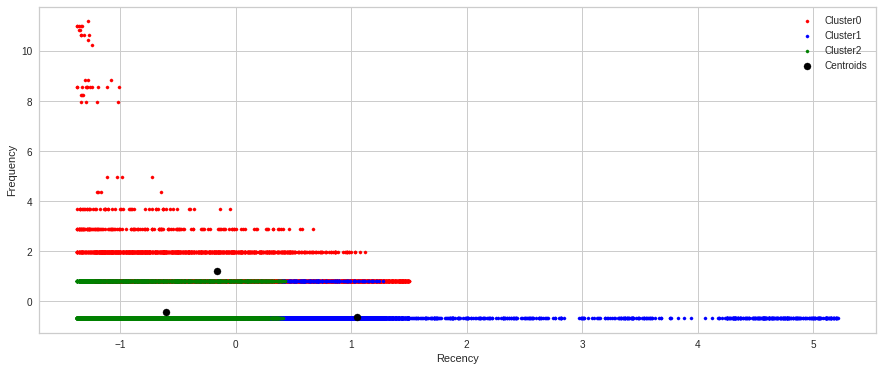

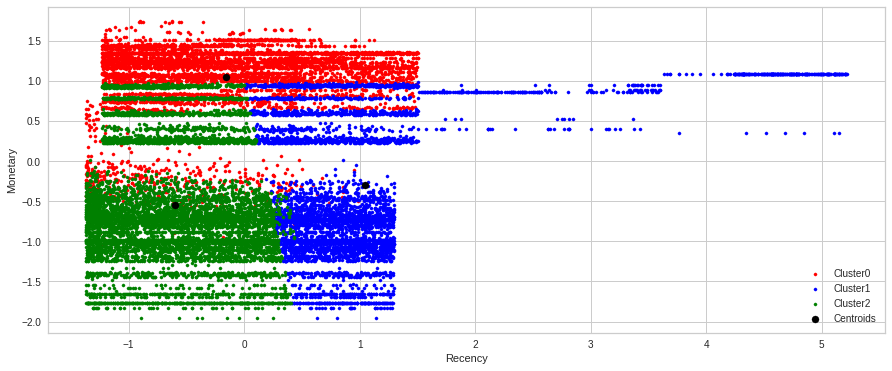

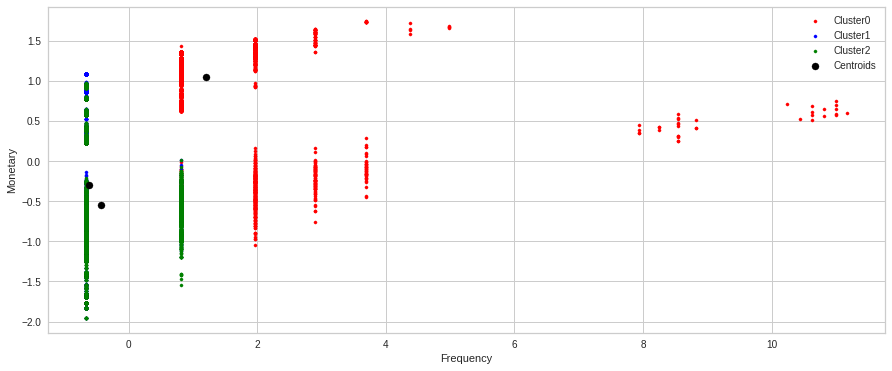

In [ ]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

**Snake plots**

In [ ]:
# Assign Cluster values to each customer in normalized dataframe
normal_df = normal_df.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_df.reset_index(),
                      id_vars=['CustomerKey','Cluster'],
                      value_vars=['Recency', 'Monetary', 'Frequency'],
                      var_name='Metric',
                      value_name='Value')
normal_melt.head()

,CustomerKey,Cluster,Metric,Value
0,11000.0,0,Recency,0.645609
1,11001.0,0,Recency,-1.074239
2,11002.0,0,Recency,1.124561
3,11003.0,0,Recency,0.595644
4,11004.0,0,Recency,0.659836


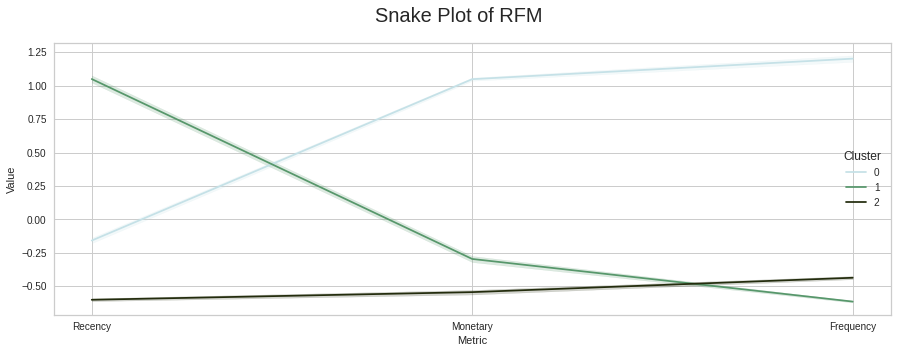

In [ ]:
# a snake plot with K-Means
plt.figure(figsize=(15,5))
palette = sns.color_palette("mako_r", 4)
sns.lineplot(x = 'Metric',
             y = 'Value',
             hue = 'Cluster',
             data = normal_melt,
             palette = "ch:4.4,.44")

plt.suptitle("Snake Plot of RFM",fontsize=20)
plt.show();

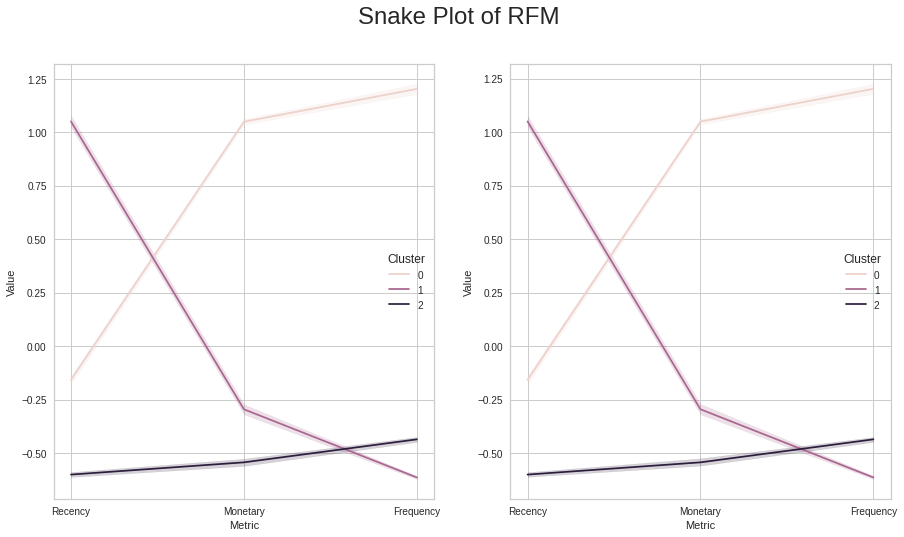

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))

sns.lineplot(x = 'Metric', y = 'Value', hue = 'Cluster', data = normal_melt,ax=ax1)

# a snake plot with K-Means

sns.lineplot(x = 'Metric', y = 'Value', hue = 'Cluster', data = normal_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 

plt.show()

NHỚ THÊM NX VÀO NHÉ

**Heat Map**


In [ ]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1

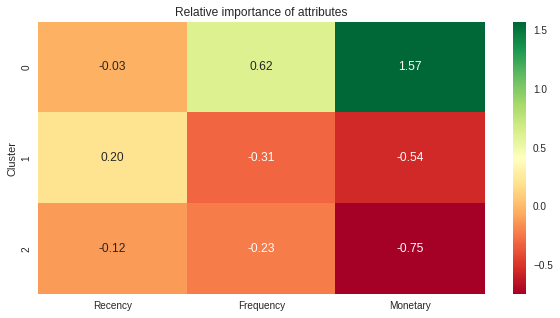

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show();

In [ ]:
Cluster_table['Frequency','Monetary','Cluster'] = Cluster_table.index


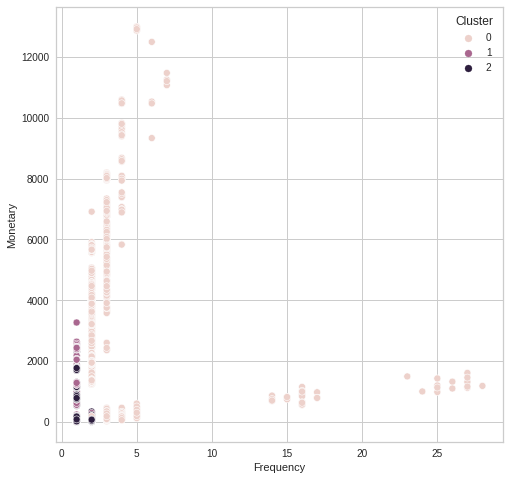

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = Cluster_table, x='Frequency', y='Monetary', hue='Cluster')

In [ ]:
RFMKMEANS = Cluster_table.copy()

RFMKMEANS['Cluster'] = ['New' if x == 2 else x for x in RFMKMEANS['Cluster']]
RFMKMEANS['Cluster'] = [' Irregular' if x == 0 else x for x in RFMKMEANS['Cluster']]
RFMKMEANS['Cluster'] = ['Loyal' if x == 1 else x for x in RFMKMEANS['Cluster']]

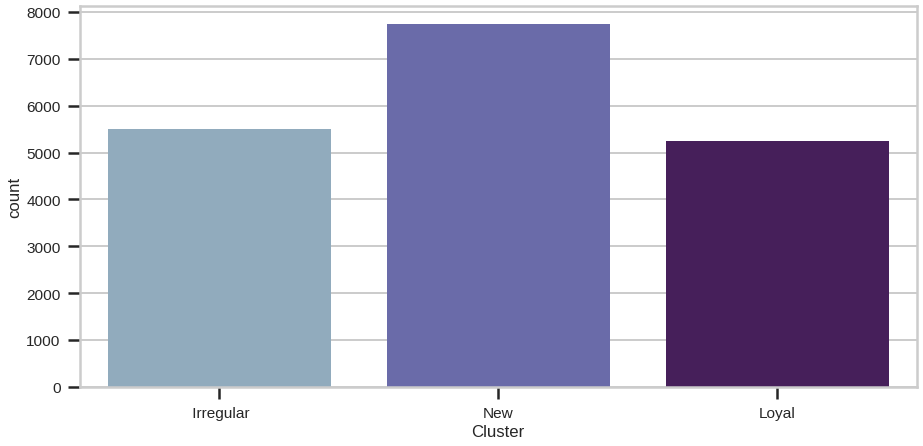

In [ ]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(RFMKMEANS['Cluster'])

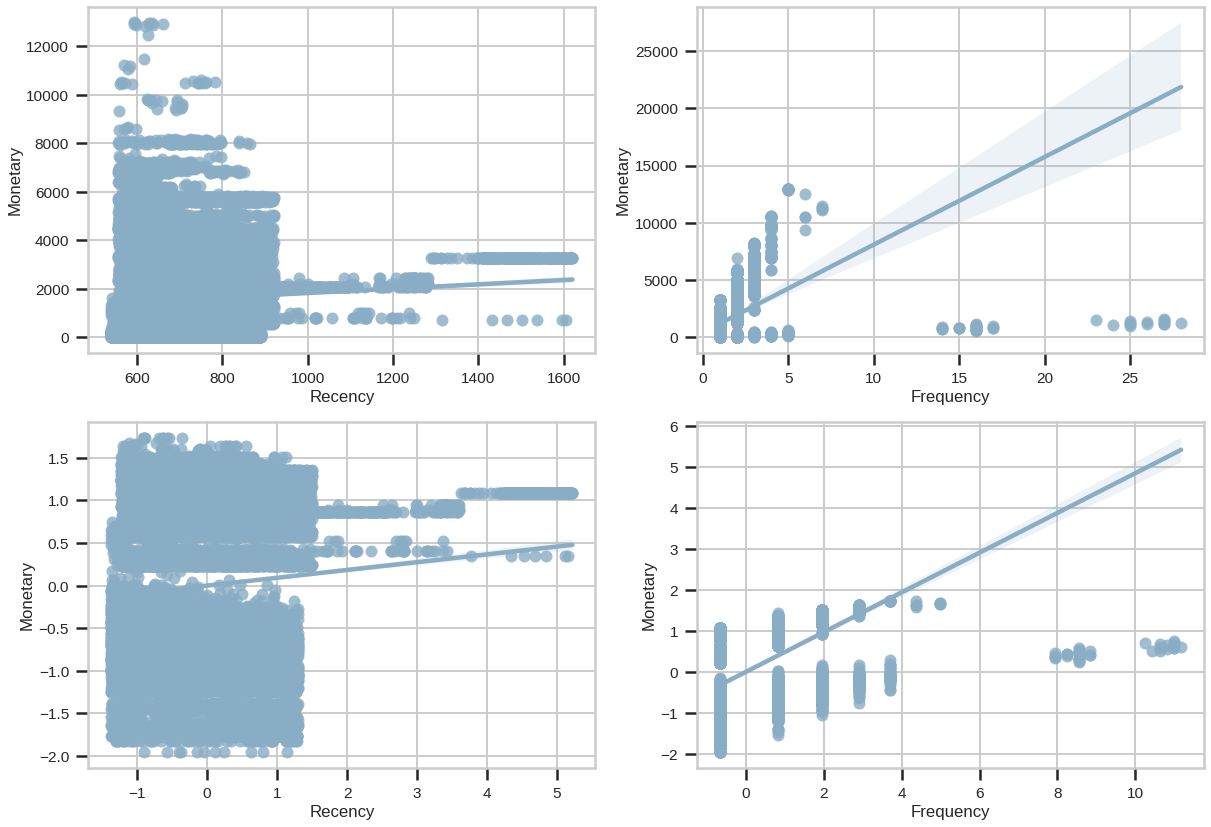

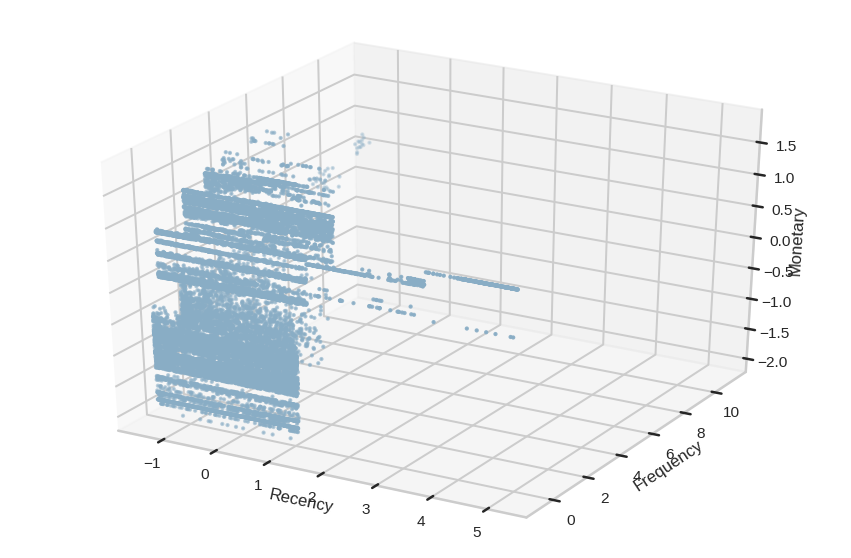

In [ ]:
fig = plt.figure(figsize=(20,14))

f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='Monetary', data=rfm_segment)
f1 = fig.add_subplot(222); sns.regplot(x='Frequency', y='Monetary', data=rfm_segment)
f1 = fig.add_subplot(223); sns.regplot(x='Recency', y='Monetary', data=normal_df)
f1 = fig.add_subplot(224); sns.regplot(x='Frequency', y='Monetary', data=normal_df)



fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =normal_df.Recency
ys = normal_df.Frequency
zs = normal_df.Monetary
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

<Figure size 1440x720 with 0 Axes>

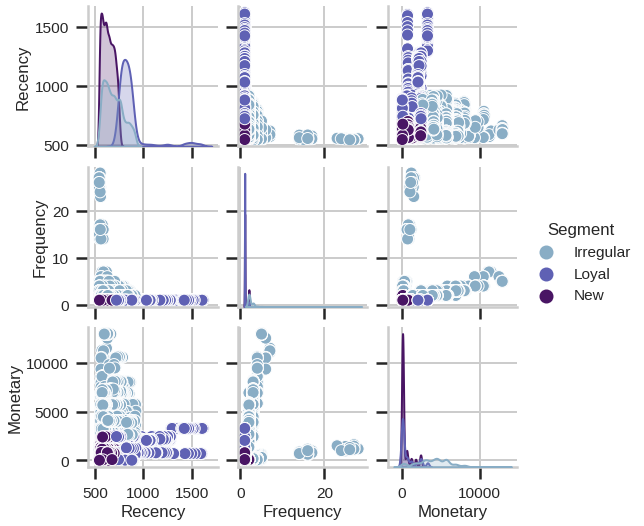

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(Cluster_table[['Recency', 'Frequency', 'Monetary','Segment']],hue='Segment');

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

In [ ]:
mycolors=['navajowhite','lightsteelblue','mediumaquamarine','thistle']


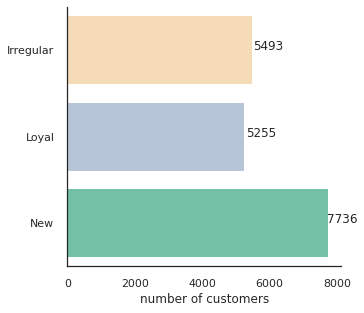

In [ ]:
# visualize
plt.figure(figsize=(10,4))
seg_names=['Irregular','Loyal','New']

# plot the number of customers in each segment
sns.set_style("white")
plt.axes([0, 0, 0.38, 0.9])
seg=Cluster_table.groupby('Segment').size().to_frame().rename(columns={0:'number of customers'}).reset_index()
sns.barplot(x='number of customers',y='Segment',data=seg,order=seg_names,palette=mycolors)
for i in [0,1,2]:
    number=int(seg.loc[seg.Segment==seg_names[i],'number of customers'])
    x_pos=round(number,-2)
    plt.text(x_pos,i,number)
plt.ylabel("")
sns.despine()


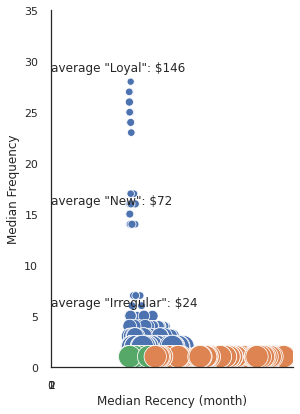

In [ ]:
plt.axes([0.5,0,0.42,0.9])
sns.scatterplot(x='Recency',y='Frequency',hue='Segment',hue_order=seg_names,color=sns.color_palette(n_colors=1),size='CustomerKey',sizes=(50,500),legend=False,data=Cluster_table)
plt.ylim(0,35)
plt.xticks(list(range(3)))
plt.text(1,29,'average "Loyal": $146')
plt.text(2,16,'average "New": $72')
plt.text(0,6,'average "Irregular": $24')
plt.xlabel('Median Recency (month)')
plt.ylabel('Median Frequency')
sns.despine()

# another plot for Kmeans

In [ ]:
x = rfm_table_scaled[['Recency','Frequency','Monetary']].values

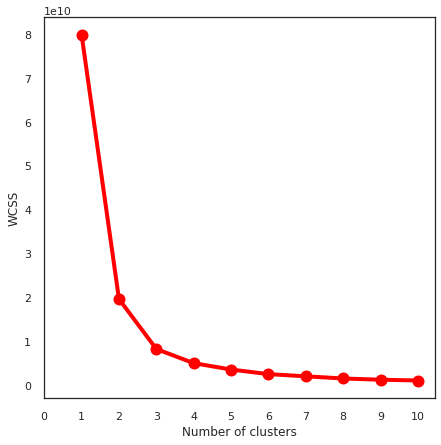

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

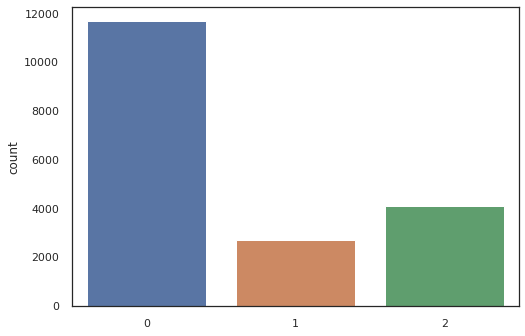

In [ ]:
sns.countplot(y_clusters)

In [ ]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

1084.0
4.0
117.25000000000001


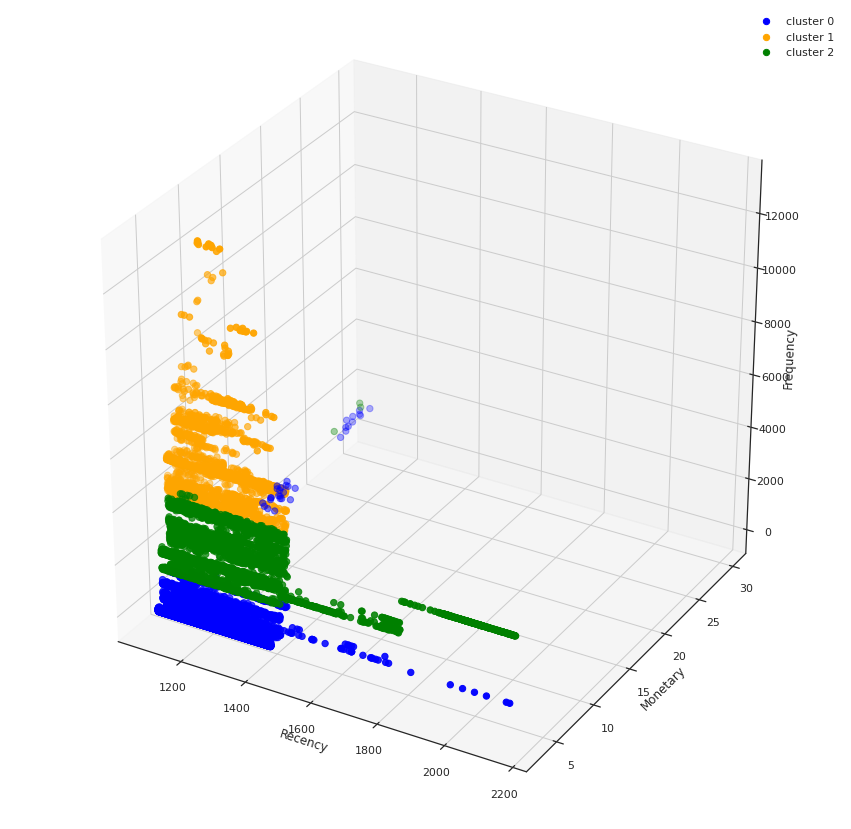

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
ax.legend()
plt.show()

In [ ]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'Monetary--->'),zaxis = dict(title  = 'Frequency-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# CLV

In [ ]:
#group by customers and check last date of purshace
recency_df = df_rfm.groupby(by='CustomerKey', as_index=False)['OrderDateKey'].max()
recency_df.columns = ['CustomerKey','LastPurshaceDate']
recency_df.head()

,CustomerKey,LastPurshaceDate
0,11000.0000,2019-10-04
1,11001.0000,2020-05-12
2,11002.0000,2019-07-27
3,11003.0000,2019-10-11
4,11004.0000,2019-10-02


In [ ]:
Cluster_table.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster,Segment,"(Frequency, Monetary, Cluster)"
CustomerKey,,,,,,,,,,
11000.0000,795,3,8120.5566,1,4,4,144,0,Irregular,11000.0000
11001.0000,574,3,6280.4466,4,4,4,444,0,Irregular,11001.0000
11002.0000,864,3,7985.6066,1,4,4,144,0,Irregular,11002.0000
11003.0000,788,3,8010.8566,2,4,4,244,0,Irregular,11003.0000
11004.0000,797,3,8067.5766,1,4,4,144,0,Irregular,11004.0000


In [ ]:
timestamp_to_datetime = datetime.datetime.fromtimestamp(timestamp_now)
print(timestamp_to_datetime)

2021-12-07 00:00:00


In [ ]:
T = df_rfm.groupby(by='CustomerKey', as_index=False)['OrderDateKey'].min()
T.columns = ['CustomerKey','FirstPurshaceDate']
T.head()

,CustomerKey,FirstPurshaceDate
0,11000.0000,2017-07-12
1,11001.0000,2017-07-09
2,11002.0000,2017-07-05
3,11003.0000,2017-07-01
4,11004.0000,2017-07-14


In [ ]:
T['T'] = T['FirstPurshaceDate'].apply(lambda x: (timestamp_to_datetime - x).days)

In [ ]:
RFM_table = Cluster_table.merge(T,on='CustomerKey')
RFM_table.head()

,CustomerKey,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster,Segment,"(Frequency, Monetary, Cluster)",FirstPurshaceDate,T
0,11000.0000,795,3,8120.5566,1,4,4,144,0,Irregular,11000.0000,2017-07-12,1609
1,11001.0000,574,3,6280.4466,4,4,4,444,0,Irregular,11001.0000,2017-07-09,1612
2,11002.0000,864,3,7985.6066,1,4,4,144,0,Irregular,11002.0000,2017-07-05,1616
3,11003.0000,788,3,8010.8566,2,4,4,244,0,Irregular,11003.0000,2017-07-01,1620
4,11004.0000,797,3,8067.5766,1,4,4,144,0,Irregular,11004.0000,2017-07-14,1607


In [ ]:
RFM_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerKey                     18484 non-null  float64       
 1   Recency                         18484 non-null  int64         
 2   Frequency                       18484 non-null  int64         
 3   Monetary                        18484 non-null  float64       
 4   R_Quartile                      18484 non-null  int64         
 5   F_Quartile                      18484 non-null  int64         
 6   M_Quartile                      18484 non-null  int64         
 7   RFMScore                        18484 non-null  object        
 8   Cluster                         18484 non-null  int32         
 9   Segment                         18484 non-null  category      
 10  (Frequency, Monetary, Cluster)  18484 non-null  float64       
 11  Fi

In [ ]:
cltv= RFM_table[['CustomerKey','Recency','Frequency',	'Monetary',	'R_Quartile',	'F_Quartile',	'M_Quartile','T']]
cltv.set_index('CustomerKey',inplace=True)
print(cltv)

             Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile     T
CustomerKey                                                                        
11000.0000       795          3 8120.5566           1           4           4  1609
11001.0000       574          3 6280.4466           4           4           4  1612
11002.0000       864          3 7985.6066           1           4           4  1616
11003.0000       788          3 8010.8566           2           4           4  1620
11004.0000       797          3 8067.5766           1           4           4  1607
...              ...        ...       ...         ...         ...         ...   ...
29479.0000      1036          1 2049.0982           1           1           3  1036
29480.0000       720          1 2442.0300           2           1           3   720
29481.0000      1424          1 3271.5566           1           1           4  1424
29482.0000      1022          1 2049.0982           1           1           

BG-NBD Model


In [ ]:
!pip install lifetimes
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import datetime as dt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [ ]:
cltv = cltv[cltv['Monetary'] > 0]
cltv['Monetary'] = cltv['Monetary'] / cltv['Frequency']

In [ ]:
# transforming days to weeks
cltv['Recency'] = cltv['Recency'] / 7
cltv['T'] = cltv['T'] / 7

In [ ]:
print(cltv['T'].mode())

0    81.7143
1   126.1429
dtype: float64


In [ ]:
cltv = cltv[(cltv['Frequency'] > 1)]

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv['Frequency'], cltv['Recency'], cltv['T'])

<lifetimes.BetaGeoFitter: fitted with 6860 subjects, a: 0.53, alpha: 344.73, b: 3.81, r: 5.96>

In [ ]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,5.9587,0.1474,5.6698,6.2475
alpha,344.7296,9.7989,325.5237,363.9356
a,0.5279,0.0528,0.4243,0.6315
b,3.8130,0.1779,3.4644,4.1616


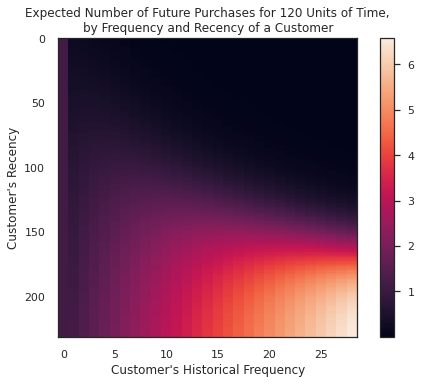

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf, T=120, );

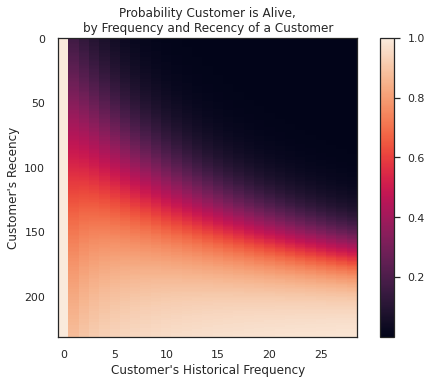

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [ ]:
#Top 10 customers expected to make the most purchases in a week
bgf.conditional_expected_number_of_purchases_up_to_time(1, # week
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10)

CustomerKey
11262.0000   0.0467
11185.0000   0.0453
11330.0000   0.0436
11200.0000   0.0434
11331.0000   0.0429
11091.0000   0.0429
11711.0000   0.0427
11223.0000   0.0427
11277.0000   0.0425
11300.0000   0.0425
dtype: float64

In [ ]:
#Top 10 customers expected to make the most purchases in a week
bgf.conditional_expected_number_of_purchases_up_to_time(1, # week
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10)

CustomerKey
11262.0000   0.0467
11185.0000   0.0453
11330.0000   0.0436
11200.0000   0.0434
11331.0000   0.0429
11091.0000   0.0429
11711.0000   0.0427
11223.0000   0.0427
11277.0000   0.0425
11300.0000   0.0425
dtype: float64

In [ ]:
bgf.conditional_expected_number_of_purchases_up_to_time(4, 
                                                 # 4 weeks = 1 month
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10)

CustomerKey
11262.0000   0.1865
11185.0000   0.1809
11330.0000   0.1739
11200.0000   0.1731
11331.0000   0.1712
11091.0000   0.1712
11711.0000   0.1705
11223.0000   0.1704
11277.0000   0.1697
11300.0000   0.1696
dtype: float64

In [ ]:
#Top 10 customers expected to make the most purchases in a month
bgf.conditional_expected_number_of_purchases_up_to_time(4, 
                                                 # 4 weeks = 1 month
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10)

CustomerKey
11262.0000   0.1865
11185.0000   0.1809
11330.0000   0.1739
11200.0000   0.1731
11331.0000   0.1712
11091.0000   0.1712
11711.0000   0.1705
11223.0000   0.1704
11277.0000   0.1697
11300.0000   0.1696
dtype: float64

In [ ]:
#Top 10 customers expected to make the most purchases in next 3 months
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 3, 
                                           # weeks * count = months
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sort_values(ascending=False).head(10)

CustomerKey
11262.0000   0.5567
11185.0000   0.5400
11330.0000   0.5192
11200.0000   0.5169
11331.0000   0.5111
11091.0000   0.5111
11711.0000   0.5090
11223.0000   0.5086
11277.0000   0.5066
11300.0000   0.5064
dtype: float64

In [ ]:
#The count of total transactions expected in next 6 months
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 3,
                                                        cltv['Frequency'],
                                                        cltv['Recency'],
                                                        cltv['T']).sum()

1033.078535975008

In [ ]:
from lifetimes.plotting import plot_period_transactions

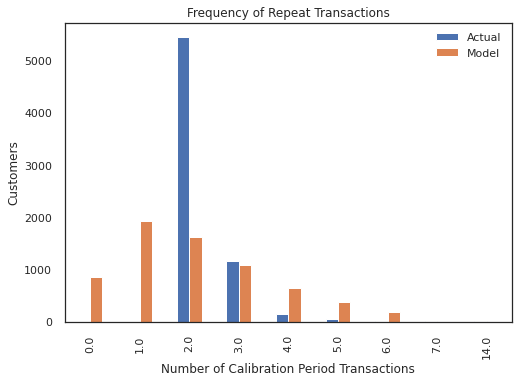

In [ ]:
plot_period_transactions(bgf)
plt.show()

           Frequency  Monetary
Frequency     1.0000   -0.0945
Monetary     -0.0945    1.0000


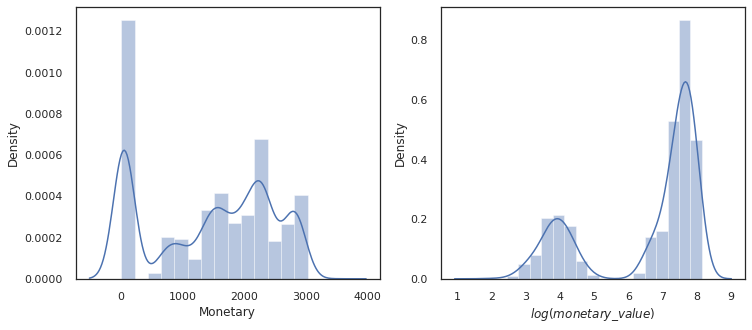

In [ ]:
# weak correlation between monetary and frequency
returning_customers_summary = cltv[cltv["Frequency"] > 0]
print(returning_customers_summary[["Frequency", "Monetary"]].corr())

fig, axes = plt.subplots(1,2,figsize=(12, 5))
sns.distplot(returning_customers_summary["Monetary"], ax=axes[0], )
sns.distplot(np.log(returning_customers_summary["Monetary"] + 1), ax=axes[1], axlabel='$log(monetary\_value)$')

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv['Frequency'], cltv['Monetary'])

<lifetimes.GammaGammaFitter: fitted with 6860 subjects, p: 3.11, q: 0.24, v: 2.99>

In [ ]:
print(ggf.conditional_expected_average_profit( 
        cltv['Frequency'], 
        cltv['Monetary'] 
    ).head(10))

CustomerKey
11000.0000   2946.8072
11001.0000   2279.3093
11002.0000   2897.8543
11003.0000   2907.0137
11004.0000   2927.5888
11005.0000   2909.5674
11006.0000   2899.6644
11007.0000   2933.0264
11008.0000   2904.1189
11009.0000   2898.6849
dtype: float64


In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv['Frequency'], cltv['Monetary'])

ggf.conditional_expected_average_profit(cltv['Frequency'],
                                        cltv['Monetary']).head(10)

ggf.conditional_expected_average_profit(cltv['Frequency'],
                                        cltv['Monetary']).sort_values(ascending=False).head(10)

cltv["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv['Frequency'],
                                                                             cltv['Monetary'])

cltv.sort_values("expected_average_profit", ascending=False).head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,T,expected_average_profit
CustomerKey,,,,,,,,
12335.0000,119.5714,2,3456.2991,1,3,4,160.1429,3936.6299
19614.0000,112.7143,2,2955.2483,1,3,4,202.1429,3366.1934
20452.0000,103.7143,2,2924.9933,2,3,4,188.8571,3331.7487
18696.0000,121.8571,2,2921.4283,1,3,4,212.2857,3327.6900
18336.0000,80.7143,2,2919.1783,4,3,4,211.8571,3325.1284
20622.0000,99.2857,2,2916.4383,2,3,4,184.2857,3322.0090
18746.0000,121.8571,2,2914.1883,1,3,4,209.4286,3319.4474
18338.0000,81.7143,2,2908.9333,4,3,4,213.4286,3313.4647
18496.0000,120.1429,2,2907.4983,1,3,4,212.5714,3311.8309


Predicting CLV by Using BG-NBD and Gamma-Gamma Models

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# The customers' lifetime values expected to in the next 3 months
cltv['cltv_pred_3_months'] = ggf.customer_lifetime_value(bgf,
                                   cltv['Frequency'],
                                   cltv['Recency'],
                                   cltv['T'],
                                   cltv['Monetary'],
                                   time=3,  # 3 months
                                   freq="W",  
# frequency information of T. In this case we set week by using 'W'
                                   discount_rate=0.01)
cltv

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,T,expected_average_profit,cltv_pred_3_months
CustomerKey,,,,,,,,,
11000.0000,113.5714,3,2706.8522,1,4,4,229.8571,2946.8072,344.9303
11001.0000,82.0000,3,2093.4822,4,4,4,230.2857,2279.3093,194.5554
11002.0000,123.4286,3,2661.8689,1,4,4,230.8571,2897.8543,362.3447
11003.0000,112.5714,3,2670.2855,2,4,4,231.4286,2907.0137,333.2339
11004.0000,113.8571,3,2689.1922,1,4,4,229.5714,2927.5888,344.2521
...,...,...,...,...,...,...,...,...,...
29398.0000,125.5714,2,1918.0183,1,3,4,220.8571,2185.3273,263.9443
29399.0000,121.2857,2,1916.5183,1,3,4,221.1429,2183.6196,256.9813
29400.0000,120.4286,2,1944.5133,1,3,4,217.5714,2215.4913,265.5403


In [ ]:
cltv1 = ggf.customer_lifetime_value(bgf,
                                   cltv['Frequency'],
                                   cltv['Recency'],
                                   cltv['T'],
                                   cltv['Monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

cltv1.head()

cltv1.shape
cltv1 = cltv1.reset_index()
cltv1.sort_values(by="clv", ascending=False).head(50)

cltv_final = cltv.merge(cltv1, on="CustomerKey", how="left")
cltv_final.sort_values(by="clv", ascending=False).head(10)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,CustomerKey,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,T,expected_average_profit,cltv_pred_3_months,clv,scaled_clv
365,11433.0000,94.4286,5,2581.9336,3,4,4,135.2857,2714.6092,665.6111,665.6111,1.0000
1169,12335.0000,119.5714,2,3456.2991,1,3,4,160.1429,3936.6299,647.2385,647.2385,0.9723
368,11439.0000,89.2857,6,2081.5283,3,4,4,135.7143,2170.0102,569.1973,569.1973,0.8548
3456,15846.0000,81.2857,2,2471.6600,4,3,4,103.7143,2815.6376,542.3085,542.3085,0.8143
3545,16000.0000,82.7143,2,2406.9750,4,3,4,99.5714,2741.9950,540.3145,540.3145,0.8113


In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 3, labels=["C", "B", "A"])
cltv_final.head()

cltv_final.sort_values(by="scaled_clv", ascending=False).head(50)

cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

CustomerKey                          Recency                      Frequency              Monetary                        R_Quartile              F_Quartile              M_Quartile                  T                      expected_average_profit                        cltv_pred_3_months                        clv                      scaled_clv                 
              count       mean           sum   count     mean         sum     count   mean   sum    count      mean          sum      count   mean   sum      count   mean   sum      count   mean   sum count     mean         sum                   count      mean          sum              count     mean         sum count     mean         sum      count   mean       sum
segment                                                                                                                                                                                                                                                                                                                                                                          
C              2287 15760.3056 36043819.0000    2287  92.0458 210508.7143      2287 2.5286  5783     2287  193.0342  441469.1511       2287 3.1058  7103       2287 3.1994  7317       2287 2.1513  4920  2287 123.7500 283016.2857                    2287  220.5248  504340.1667               2287  32.7547  74909.9725  2287  32.7547  74909.9725       2287 0.0470  107.4699
B              2286 19001.3609 43437111.0000    2286  98.1914 224465.5714      2286 2.1531  4922     2286 1740.2443 3978198.4759       2286 2.6920  6154       2286 3.1352  7167       2286 3.8828  8876  2286 179.5722 410502.1429                    2286 1969.0146 4501167.3416               2286 257.2336 588036.0501  2286 257.2336 588036.0501       2286 0.3850  880.1805
A              2287 16521.7853 37785323.0000    2287 101.8752 232988.5714      2287 2.3118  5287     2287 2395.6542 5478861.1359       2287 2.3909  5468       2287 3.2807  7503       2287 4.0000  9148  2287 170.1289 389084.7143                    2287 2695.3649 6164299.4320               2287 401.8575 919048.1808  2287 401.8575 919048.1808       2287 0.6028 1378.6440